# 1. Perkenalan

> Bab pengenalan diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai

---
`Nama` : Guardian Tri Anggoro

`Batch` : 024-RMT

`Dataset` : House Pricing Perth

`Tujuan` : Tujuan utama proyek ini adalah mengembangkan model prediksi harga rumah yang dapat memberikan estimasi yang akurat berdasarkan berbagai fitur dan faktor yang memengaruhi harga properti. Dengan menggunakan model regression seperti linear reggresion, knn regressor, SVR (Support Vector Reggresor), DecisionTree Regressor, RandomForest Regressor, AdaBoost Regressor, Linear Regression,SGD Regressor

---
Latar Belakang :

Dalam beberapa tahun terakhir, pasar properti telah menjadi salah satu sektor ekonomi yang paling dinamis. Permintaan akan rumah terus meningkat, sementara faktor-faktor seperti lokasi, fasilitas, dan kondisi pasar dapat mempengaruhi harga properti secara signifikan. Oleh karena itu, kemampuan untuk secara akurat memprediksi harga rumah menjadi krusial bagi pembeli, penjual, dan pemegang kepentingan lainnya di pasar properti.

---
Problem Statement : 

Perusahaan real estate AAA memiliki sejumlah properti di pasar yang berkembang pesat. Dalam upaya untuk meningkatkan efisiensi penjualan dan memberikan pengalaman yang lebih baik kepada pelanggan, perusahaan ingin mengembangkan model prediksi harga rumah. Model ini diharapkan dapat membantu agen real estate dan pembeli untuk mendapatkan perkiraan harga yang akurat dan realistis.

# 2. Import Libaries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 
import pickle

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## Dataset Information

***Dataset Information***

- 'ADDRESS': menunjukkan alamat rumah di daerah perth.

- 'SUBURB': Menunjukkan nama daerah pada pinggir kota.

- 'PRICE': Menunjukkan harga rumah pada saat terakhir di beli.

- 'BEDROOMS': Menunjukkan jumlah kamar dalam rumah.

- 'BATHROOMS': Menunjukkan jumlah kamar mandi dalam rumah.

- 'GARAGE': Menunjukkan jumlah garasi dalam rumah.

- 'LAND_AREA': Menunjukkan Luas tanah dalam meter persegi.

- 'FLOOR_AREA': menunjukkan Luas lantai dalam meter persegi.

- 'BUILD_YEAR': menunjukkan Tahun rumah itu dibangun

- 'CBD_DIST': Menunjukkan Jarak ke Kawasan Pusat Bisnis

- 'NEAREST_STN': Menunjukkan Stasiun kereta terdekat.

- 'NEAREST_STN_DIST	': Menunjukkan Jarak ke stasiun kereta terdekat.

- 'DATE_SOLD': Menunjukkan Tanggal properti terakhir dijual.

- 'POSTCODE': Menunjukkan Kode pos rumah.

- 'LATITUDE	' : Lintang alamat 

- 'LONGITUDE' : Bujur alamat

- 'NEAREST_SCH' : Menunjukkan Sekolah terdekat 

- 'NEAREST_SCH_DIST': Menunjukkan jarak Sekolah terderkat

- 'NEAREST_SCH_RANK' : Menunjukkan ranking sekolah

- Sumber Dataset : https://www.kaggle.com/datasets/syuzai/perth-house-prices

In [2]:
# Load Dataset
data = pd.read_csv('all_perth_310121.csv')

# Duplicate Data
dataduplicate = data.copy()

# Menampilkan 10 data awal
data.head(10)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
5,1 Amethyst Crescent,Mount Richon,409000,4,2,1.0,759,118,1991.0,27300,Armadale Station,1000,03-2013\r,6112,-32.153801,116.023658,ARMADALE SENIOR HIGH SCHOOL,1.227219,NaN
6,1 Ardara Lane,Hilbert,400000,3,2,2.0,386,132,2014.0,28200,Armadale Station,3700,05-2016\r,6112,-32.179978,115.988647,DALE CHRISTIAN SCHOOL,2.485731,NaN
7,1 Arnside Bend,Waikiki,370000,4,2,2.0,468,158,2013.0,41700,Warnbro Station,1100,03-2019\r,6169,-32.317662,115.761968,SOUTH COAST BAPTIST COLLEGE,0.491573,NaN
8,1 Arrochar Court,Hamersley,565000,4,2,3.0,875,168,1983.0,12100,Warwick Station,2500,06-2020\r,6022,-31.847760,115.822700,WARWICK SENIOR HIGH SCHOOL,1.221928,NaN
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0


In [3]:
# Menampilkan 10 data terakhir
data.tail(10)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33646,9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,04-2017\r,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0
33647,9B Shalford Way,Girrawheen,245000,3,1,4.0,381,85,1974.0,12600,Warwick Station,4400,07-2018\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997.0,16000,Fremantle Station,1900,02-2019\r,6162,-32.066410,115.756070,FREMANTLE COLLEGE,1.134956,128.0
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2.0,296,95,NaN,16700,Midland Station,1700,05-2016\r,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


## Data Summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

**INSIGHT :**
-   Pada data info diatas dapat dijelaskan bahwa :
    -   Data terdiri dari 19 column
    -   Tiap Column pada DataFrame berisikan 33656 data
    -   Memory Usage sebesar 4.9+ MB
    -   Data type terdiri dari `object`, `float` dan `int`
    -   Column `ADDRESS`, `SUBURB`, `NEAREST_STN`, `DATE_SOLD`, `NEAREST_SCH`,`NEAREST_SCH_RANK` merupakan column categorical
    -   Column `PRICE`, `BEDROOMS`, `BATHROOMS`, `GARAGE`, `LAND_AREA`, `FLOOR_AREA`,`BUILD_YEAR`, `CBD_DIST`, `NEAREST_STN_DIST`, `LATITUDE`, `LONGITUDE`, `NEAREST_SCH_DIST` merupakan column numerical
    

## Data Describe

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


**INSIGHT :**
-   Nilai minimum dan maximum terlihat dapat menjelaskan bahwa data diatas merupakan benar data numerical, bukan data binary atau ordinal
-   Terlihat pada setiap column data numerical terdapat beberapa column yang memiliki nilai mean > median yang menandakan column tersebut memiliki distribusi skew. Column-Column tersebut adalah :
    -   `PRICE`
    -   `GARAGE`
    -   `LAND_AREA`
    -   `FLOOR_AREA`
    -   `CBD_DIST`
    -   `NEAREST_STN_DIST`
    -   `POSTCODE`
    -   `LATITUDE`
    -   `LONGITUDE`
    -   `NEAREST_SCH_DIST`
    -   `NEAREST_SCH_RANK`
-   Terlihat pada setiap column numerical juga terdapat beberapa column yang memiliki nilai mean < median yang menandakan column tersebut memiliki distribusi yang normal. Column-Column tersebut adalah :
    -   `BEDROOMS`
    -   `BATHROOMS`
    -   `BUILD_YEAR`

## Describe Column Categorical

In [6]:
# Membuat kolom yang termasuk dalam kategori bernama 'categorical'
categorical = data[['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH']]

# Menampilkan value count category
for i in categorical.columns:
    print(f"Value counts of {i} column")
    print(categorical[i].value_counts(), '\n')

Value counts of ADDRESS column
123 Fairway            3
68 Margaret Street     2
20 Third Avenue        2
5 William Street       2
34 Halcyon Way         2
                      ..
20 Metroliner Drive    1
20 Mentor Street       1
20 Melvich Green       1
20 Melrose Crescent    1
9E Margaret Street     1
Name: ADDRESS, Length: 33566, dtype: int64 

Value counts of SUBURB column
Bertram            231
Iluka              212
Bennett Springs    211
Mindarie           209
Carramar           208
                  ... 
Munster              1
Kwinana Beach        1
Welshpool            1
Wangara              1
Naval Base           1
Name: SUBURB, Length: 321, dtype: int64 

Value counts of NEAREST_STN column
Midland Station             4141
Warwick Station             1696
Cockburn Central Station    1640
Armadale Station            1372
Butler Station              1178
                            ... 
East Perth Station            35
Mosman Park Station           33
McIver Station           

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### Melihat Distribusi Data Column Price

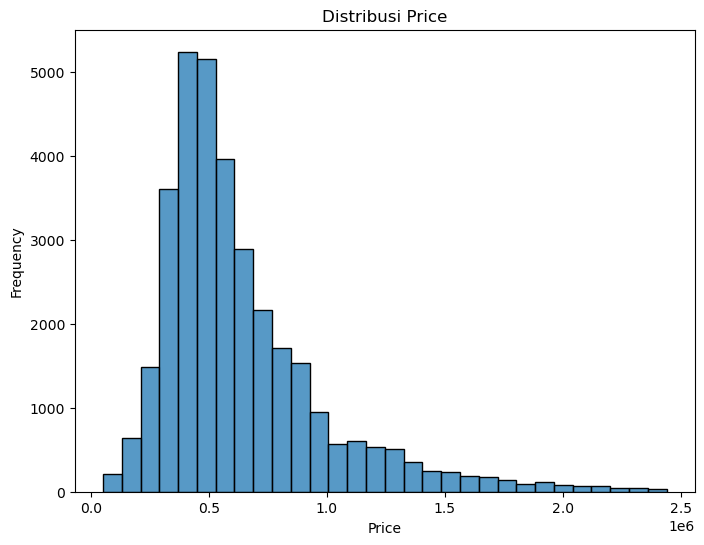

In [7]:
# Menampilkan distribusi Limit Balance
plt.figure(figsize=(8, 6))
sns.histplot(data['PRICE'], bins=30, kde=False)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribusi Price')
plt.show()

In [8]:
# Melihat Median Limit Balance
medianPrice = data['PRICE'].median()

# Melihat Value Count
ValueCountLB = data['PRICE'].value_counts()
ValueCountLB_df = pd.DataFrame(ValueCountLB)

print(f'Nilai titik tengah / Median berada pada {medianPrice}')
ValueCountLB_df.head(3)

Nilai titik tengah / Median berada pada 535500.0


,PRICE
430000,361
400000,342
450000,339


**INSIGHT:**
-   Pada histogram diatas, didapatkan bahwa column price memiliki distribusi data yang skew.
-   Terlihat juga bahwa titik tengah harga rumah di kawasan perth australia berada pada harga 535500 AUD
-   Sedangkan total jumlah harga rumah yang memiliki frekuensi terbanyak pada harga 430000 AUD sebanyak 361 unit

### Melihat Perubahan Price Rumah Bedasarkan Tahun Pembuatan Rumah

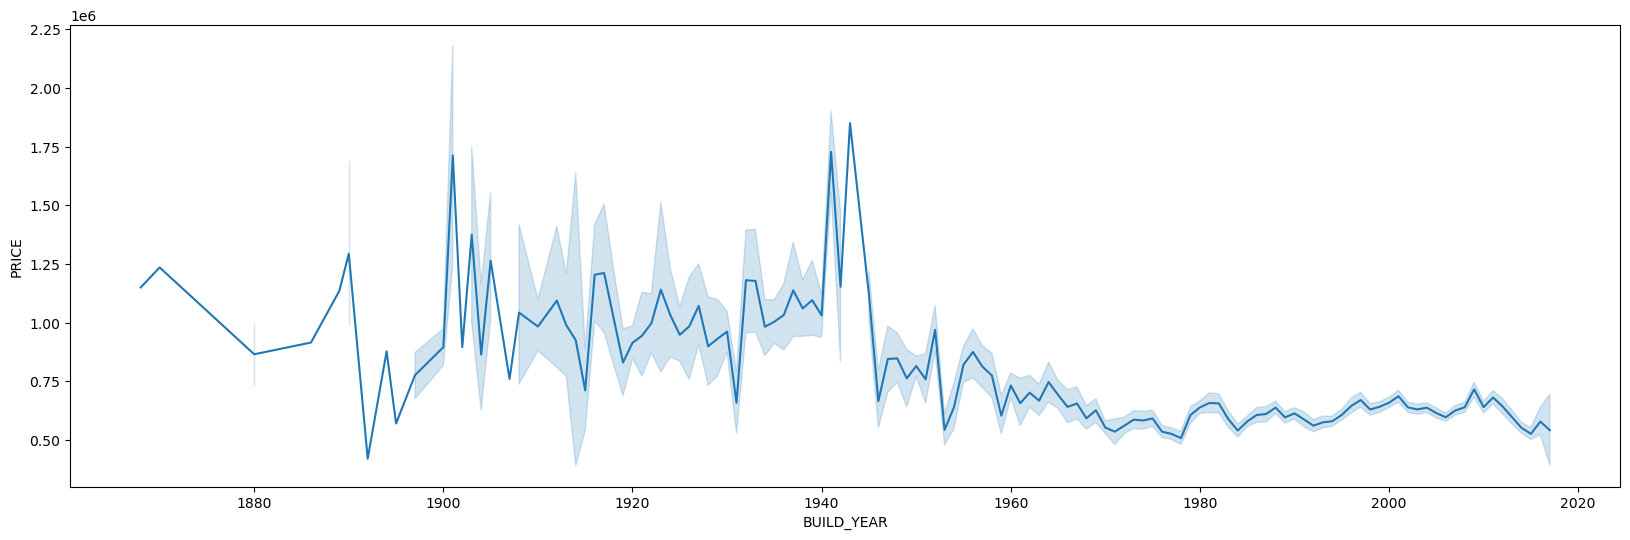

In [9]:
plt.figure(figsize=(20,6))
fig = sns.lineplot(x=data['BUILD_YEAR'], y=data['PRICE'])

**INSIGHT:**
-   Terlihat pada line plot diatas bahwa harga rumah pada kawasan perth australia memiliki harga yang fluktuatif. Berdasarkan tahun pembuatan, harga rumah tertinggi dipegang oleh rumah yang di bangun pada tahun 1900an dan 1940an.
-   Hal ini mengindikasi bahwa pada tahun 1900an dan 1940an terjadi peningkatan permintaan pada bidang property khususnya rumah. Namun jika dilihat ke beberapa tahun berikutnya, harga rumah bisa dibilang mengalami penurunan. Hal ini mengindikasi bahwa permintaan pada bidang property untuk rumah mulai menurun. Hal ini bisa didukung dengan kemajuan teknologi dan inspirasi dimana pada zaman sekarang sudah ada pengganti untuk property untuk rumah, yaitu apartement dimana harga apertemen bisa dibilang jauh lebih murah dibanding dengan membeli rumah.

### Melihat Persebaran Rumah Berdasarkan Jumlah Kamar dan Jumlah Kamar Mandi

In [10]:
# Menghitung jumlah kamar
df3 = data['BEDROOMS'].value_counts().reset_index()
df3.columns = ['BEDROOMS', 'Value']

# Mengatur sequence warna
colors = px.colors.qualitative.Set3

# Membuat pie chart dengan pengaturan visual yang diperindah
fig3 = px.pie(df3, 
              values='Value', 
              names='BEDROOMS', 
              color_discrete_sequence=colors,
              title='Persebaran Rumah berdasarkan Jumlah Kamar')

# Menambahkan layout yang lebih rapi
fig3.update_traces(textposition='inside', textinfo='percent+label')
fig3.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    legend=dict(title='BEDROOMS'),
    title_font=dict(size=20),
    title_x=0.5
)

# Menampilkan pie chart
fig3.show()

**INSIGHT :**
-   Dapat dilihat dari pie chart diatas, bahwa kebanyakan rumah pada kawasan perth memiliki jumlah kamar sebanyak 4 kamar dengan presentase 52.4%
-   Diikuti dengan jumlah kamar sebanyak 3 kamar sebanyak 34.5%
-   Hal ini mengindikasi bahwa kawasan pada rumah perth di isi dengan 3 - 4 orang yang bisa dibilang cocok bagi orang-orang yang baru membina rumah tangga yang terdiri dari ayah ibu dan anak.
-   Selain itu hal ini juga mengindikasi bahwa perumahan pada kawasan perth diperuntukan bagi orang-orang yang ingin memiliki rumah yang tidak mau memiliki banyak kamar di dalam rumahnya.

In [11]:
# Menghitung jumlah kamar mandi
df3 = data['BATHROOMS'].value_counts().reset_index()
df3.columns = ['BATHROOMS', 'Value']

# Mengatur sequence warna
colors = px.colors.qualitative.Set3

# Membuat pie chart dengan pengaturan visual yang diperindah
fig3 = px.pie(df3, 
              values='Value', 
              names='BATHROOMS', 
              color_discrete_sequence=colors,
              title='Persebaran Rumah berdasarkan Jumlah Kamar Mandi')

# Menambahkan layout yang lebih rapi
fig3.update_traces(textposition='inside', textinfo='percent+label')
fig3.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    legend=dict(title='BATHROOMS'),
    title_font=dict(size=20),
    title_x=0.5
)

# Menampilkan pie chart
fig3.show()

**INSIGHT :**
-   Dapat dilihat dari pie chart diatas, bahwa kebanyakan rumah pada kawasan perth memiliki jumlah kamar mandi sebanyak 2 kamar mandi dengan presentase 66.2%
-   Diikuti dengan jumlah kamar sebanyak 1 kamar sebanyak 26.3%
-   Hal ini bisa dikatakan normal, dikarenakan memang tidak hanya di perth australia, bahkan di indonesia pun kebanyakan rumah hanya memiliki kamar mandi dengan jumlah 1-2 kamar mandi.

### Melihat 5 Kota Mana Saja Yang Memiliki Rata-Rata Harga Rumah Tertinggi

In [12]:
# Melihat top 5 harga rumah bersarakan suburb
top5_city_price = (data
            .groupby(['SUBURB'])
            .agg(mean_price=('PRICE','mean'), mean_cbd_dist=('CBD_DIST','mean'))
            .reset_index()
            .sort_values('mean_price',ascending=False)
            .head(5)
            )
top5_city_price

,SUBURB,mean_price,mean_cbd_dist
83,Dalkeith,1.951092e+06,7454.794521
237,Peppermint Grove,1.793549e+06,10402.439024
67,City Beach,1.654765e+06,9414.102564
214,Nedlands,1.647442e+06,6021.153846
78,Cottesloe,1.646283e+06,10357.971014


<Axes: xlabel='SUBURB', ylabel='mean_price'>

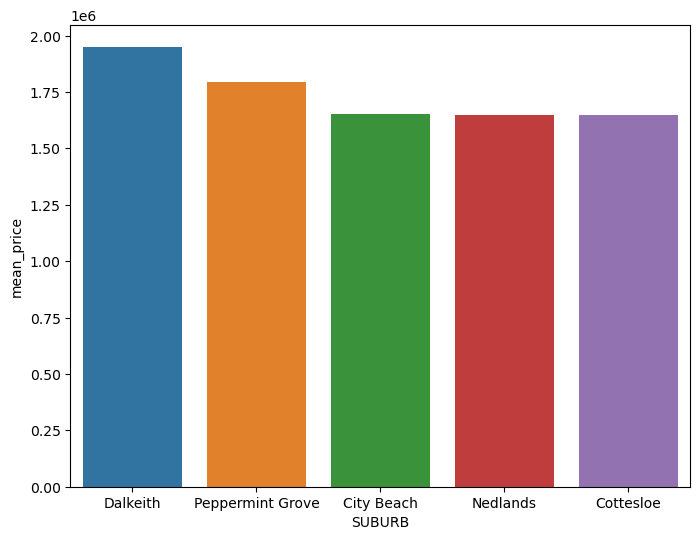

In [13]:
plt.figure(figsize=(8,6))
top5_city_price['SUBURB'] = top5_city_price['SUBURB'].astype(str)
sns.barplot(data=top5_city_price, x='SUBURB', y='mean_price')

**INSIGHT :**
-   Terlihat pada barchart diatas, bahwa kawasan pada perth yang memiliki rata-rata harga rumah termahal terdapat pada :
    -   Daiketh dengan rata-rata harga rumah sebesar 1,951,092 AUD
    -   Peppermint Grove dengan rata-rata harga rumah sebsar 1.793.549 AUD
    -   City Beach dengan rata-rata harga rumah sebesar	1,654,765 AUD
    -   Nedlands dengan rata-rata harga rumah sebesar	1,647,442 AUD
    -   Cottesloe dengan rata-rata harga rumah sebesar	1,646,283 AUD
-   Hal ini mengindikasi bahwa rata-rata harga pada kawasan perth bisa dikatakan tidaklah murah. Sehingga hal ini bisa dijadikan strategi untuk pemilik property agar menargetkan calon pembeli yang memang benar-benar memiliki impian untuk tinggal di daerah perth.

### Melihat Hubungan Price Dengan Rata-Rata NEAREST_SCH_DIST

In [14]:
# Melihat top data mean nearest sch dist berdasarkan harga dan suburb
nearest_sch_price = (data
            .groupby(['SUBURB'])
            .agg(mean_price=('PRICE','mean'), mean_nearest_sch_dist=('NEAREST_SCH_DIST','mean'))
            .reset_index()
            .sort_values('mean_nearest_sch_dist',ascending=True))
nearest_sch_price.head(5)

,SUBURB,mean_price,mean_nearest_sch_dist
167,Kwinana Town Centre,1.855983e+05,0.465059
237,Peppermint Grove,1.793549e+06,0.472977
191,Merriwa,3.331893e+05,0.484518
172,Leederville,8.591136e+05,0.495988
170,Lathlain,7.269861e+05,0.572652


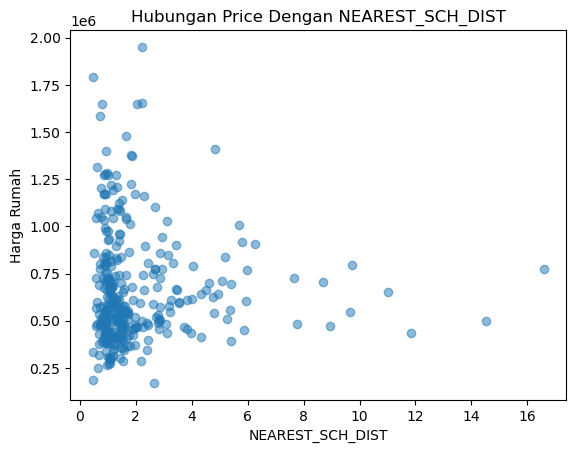

In [15]:
# Membuat scatter plot
plt.scatter(x='mean_nearest_sch_dist', y='mean_price', data=nearest_sch_price, alpha=0.5)

# Menambahkan label sumbu dan judul
plt.xlabel('NEAREST_SCH_DIST')
plt.ylabel('Harga Rumah')
plt.title('Hubungan Price Dengan NEAREST_SCH_DIST')

# Menampilkan plot
plt.show()

**INSIGHT :**
-   Terlihat pada scatterplot diatas, bahwa jarak sekolah terdekat tidak selalu berpengaruh terhadap harga rumah. Dimana jika kita lihat pada tabel diatas, terdapat rumah-rumah yang memiliki harga yang bisa dibilang tinggi walaupun dekat dengan jarak sekolah. Hal ini memang bisa terjadi dikarenakan terdapat faktor-faktor lain yang bisa mempengaruhi harga rumah mulai dari luas lantai, jumlah kamar, jumlah kamar mandi, garasi, dll.

### Melihat Hubungan Price Dengan NEAREST_STN_DIST	

In [16]:
# Melihat nearest stn dist berdasarkan harga dan suburb
nearest_stn_price = (data
            .groupby(['SUBURB'])
            .agg(mean_price=('PRICE','mean'), mean_nearest_stn_dist=('NEAREST_STN_DIST','mean'))
            .reset_index()
            .sort_values('mean_nearest_stn_dist',ascending=True))
nearest_stn_price.head(5)

,SUBURB,mean_price,mean_nearest_stn_dist
313,Woodbridge,6.005476e+05,349.134454
300,Welshpool,4.650000e+05,467.000000
82,Daglish,1.044677e+06,468.525253
49,Burswood,9.752286e+05,473.285714
78,Cottesloe,1.646283e+06,502.942029


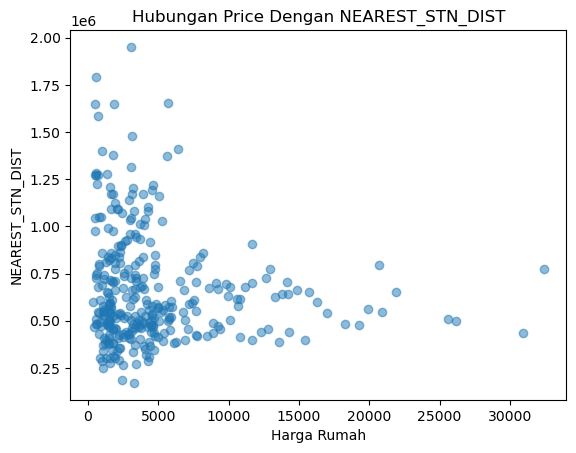

In [17]:
# Membuat scatter plot
plt.scatter(x='mean_nearest_stn_dist', y='mean_price', data=nearest_stn_price, alpha=0.5)

# Menambahkan label sumbu dan judul
plt.xlabel('Harga Rumah')
plt.ylabel('NEAREST_STN_DIST')
plt.title('Hubungan Price Dengan NEAREST_STN_DIST')

# Menampilkan plot
plt.show()

**INSIGHT :**
-   Terlihat pada scatterplot diatas, bahwa jarak stasiun terdekat tidak selalu berpengaruh terhadap harga rumah sama seperti dengan jarak sekolah. Dimana jika kita lihat pada tabel diatas, terdapat rumah-rumah yang memiliki harga yang bisa dibilang tinggi walaupun dekat dengan jarak statsiun. Hal ini memang bisa terjadi dikarenakan faktor dari stasiun itu sendiri, stasiun yang memiliki jurusan yang banyak atau sedikit atau stasiun yang biasanya dikujungi orang-orang atau tidak. Selain itu terdapat faktor-faktor lain yang bisa mempengaruhi harga rumah mulai dari luas lantai, jumlah kamar, jumlah kamar mandi, garasi, dll.

### Melihat Hubungan Price Dengan CBD_DIST	

In [18]:
# Melihat rata-rata cbd dist berdasarkan harga dan sub urb
cbd_dist_price = (data
            .groupby(['SUBURB'])
            .agg(mean_price=('PRICE','mean'), mean_cbd_dist=('CBD_DIST','mean'))
            .reset_index()
            .sort_values('mean_cbd_dist',ascending=True))
cbd_dist_price.head(5)

,SUBURB,mean_price,mean_cbd_dist
223,Northbridge,721636.363636,1254.181818
93,East Perth,510181.818182,1590.909091
304,West Perth,681065.217391,1613.043478
128,Highgate,790883.026316,1776.315789
222,North Perth,849586.666667,2826.666667


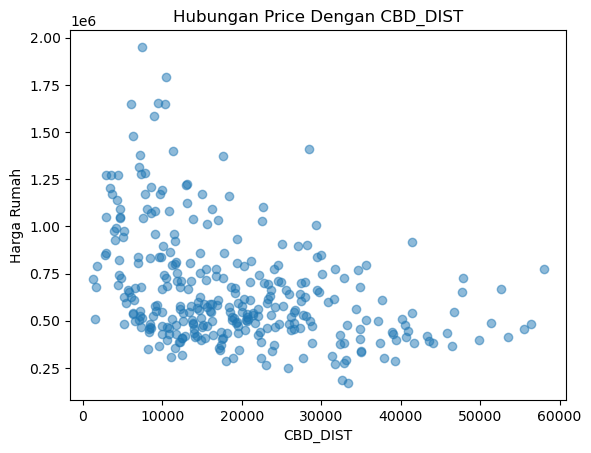

In [19]:
# Membuat scatter plot
plt.scatter(x='mean_cbd_dist', y='mean_price', data=cbd_dist_price, alpha=0.5)

# Menambahkan label sumbu dan judul
plt.xlabel('CBD_DIST')
plt.ylabel('Harga Rumah')
plt.title('Hubungan Price Dengan CBD_DIST')

# Menampilkan plot
plt.show()

**INSIGHT :**
-   Terlihat pada scatterplot diatas, bahwa jarak Kawasan Pusat Bisnis bisa dikatakan memiliki pengaruh, dimana semakin dekat rumah dengan kawasan bisnis maka harga rumah tersebut semakin tinggi. Selain itu, terdapat juga harga rumah yang tinggi walaupun jarak ke kawasan pusat bisnis tidak terlalu dekat. Hal ini bisa terjadi dikarenakan terdapat faktor-faktor lain yang mempengaruhi harga rumah tersebut. Seperti kawasannya, luas lantai rumah, jumlah kamar, jumlah kamar mandi, dan lain-lain.

# 5. Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Data Editing

In [20]:
# Duplicate Data
dataduplicate = data.copy()

# Melakukan drop pada column addres karena tidak ada hubungan dengan harga rumah
dataduplicate.drop(['ADDRESS'],axis=1,inplace=True)

# Melakukan drop pada column NEAREST_STN karena tidak ada hubungan dengan harga rumah
dataduplicate.drop(['NEAREST_STN'],axis=1,inplace=True)

# Melakukan drop pada column NEAREST_SCH karena tidak ada hubungan dengan harga rumah
dataduplicate.drop(['NEAREST_SCH'],axis=1,inplace=True)

# Melakukan drop pada column DATE_SOLD karena tidak ada hubungan dengan harga rumah
dataduplicate.drop(['DATE_SOLD'],axis=1,inplace=True)

## Mengecek Duplicate Data

In [21]:
# Melakukan Checking Data Duplicate
duplicate = dataduplicate.duplicated().sum()
print(f'Jumlah Data Duplicate {duplicate}')

Jumlah Data Duplicate 0


## Membagi Data menjadi data Numerikal dan Kategorikal

In [22]:
# Membuat variabel categorical
categorical_data = dataduplicate[['SUBURB']]

# Membuat Variabel Numerical
numerical_data = dataduplicate[['PRICE', 'BEDROOMS','BATHROOMS','GARAGE','LAND_AREA', 'FLOOR_AREA', "BUILD_YEAR",'CBD_DIST','NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',	
                                'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK']]

## Cardinality Handling

> Handling Cardinality Hanya dilakukan pada kolom Categorical

In [23]:
# Menghitung Cardinality pada data categorical
for i in categorical_data.columns:
    print(f'cardinality kolom {i}:', categorical_data[i].nunique())


cardinality kolom SUBURB: 321


**INSIGHT :**
-   Terdapat 321 unique values pada column SUBURB yang menunjukkan high cardinality. Sehingga perlu dilakukan Handling Cardinality.
-   Saya akan membagi SUBURB pada data berdasarkan Local Goverment Area berdasarkan dari sumber dari Wikipedia List of Perth Suburbs (https://en.wikipedia.org/wiki/List_of_Perth_suburbs)

In [24]:
dataduplicate['SUBURB'].unique()

array(['South Lake', 'Wandi', 'Camillo', 'Bellevue', 'Lockridge',
       'Mount Richon', 'Hilbert', 'Waikiki', 'Hamersley', 'Bayswater',
       'Carmel', 'Butler', 'Balga', 'Hammond Park', 'Wattle Grove',
       'Bull Creek', 'Bullsbrook', 'Maida Vale', 'Koongamia',
       'Mount Nasura', 'Forrestdale', 'Atwell', 'Ashby', 'Woodbridge',
       'Bicton', 'Singleton', 'South Guildford', 'Armadale', 'Kenwick',
       'Hamilton Hill', 'Port Kennedy', 'Roleystone', 'Glen Forrest',
       'Secret Harbour', 'Herne Hill', 'Gwelup', 'Harrisdale',
       'North Fremantle', 'Quinns Rocks', 'Spearwood', 'Parkwood',
       'Tapping', 'Thornlie', 'Baldivis', 'Kensington', 'Kiara', 'Menora',
       'Southern River', 'Bibra Lake', 'Swanbourne', 'The Vines',
       'Stratton', 'North Beach', 'Haynes', 'Madeley', 'Wembley Downs',
       'Bentley', 'Manning', 'Warwick', 'Queens Park', 'Medina',
       'Kalamunda', 'Merriwa', 'Aubin Grove', 'Karrinyup',
       'Gooseberry Hill', 'Darch', 'Hillarys', 'Alexa

-   1 = `Armedale` : Armadale , Ashendon, Bedfordale ,Brookdale	, Camillo, Champion Lakes, Forrestdale, Harrisdale, Haynes, Hilbert, Karragullen, Kelmscott, Mount Nasura, Mount Richon, Piara Waters, Roleystone, Seville Grove, Wungong
-   2 = `Bassendean` : Eden Hill, Bassendean, Ashfield 
-   3 = `Bayswater`  : Bayswater, Bedford, Dianella, Embleton, Maylands, Morley, Noranda
-   4 = `Belmont`    : Ascot, Belmont, Cloverdale, Kewdale, Perth Airport, Redcliffe, Rivervale 
-   5 = `Bunbury`    : Bunbury 
-   6 = `Busselton`  : Busselton 
-   7 = `Cambridge`  : City Beach, Daglish, Floreat, Wembley, West Leederville 
-   8 = `Canning`    : Bentley, Cannington, Canning Vale, East Cannington, Ferndale, Lynwood, Parkwood, Queens Park, Riverton, Rossmoyne, Shelley, Welshpool, Willetton, Wilson
-   9 = `Claremont`  : Claremont, Swanbourne
-   10 = `Cockburn`  : Atwell, Aubin Grove, Banjup, Beeliar, Bibra Lake, Coogee, Coolbellup, Hamilton Hill, Hammond Hill, Henderson, Jandakot, Munster, North Lake, South Lake, Spearwood, Success, Wattleup, Yangebup 
-   11 = `Cottesloe` : Cottesloe 
-   12 = `East Fremantle` : East Fremantle 
-   13 = `Fremantle` : Beaconsfield, Fremantle, Hilton, North Fremantle, O’Connor, Samson, South Fremantle, White Gum Valley 
-   14 = `Gosnells`  : Beckenham, Gosnells, Huntingdale, Kenwick, Langford, Maddington, Martin, Orange Grove, Southern River, Thornlie 
-   15 = `Joondalup` : Beldon, Burns Beach, Connolly, Craigie, Currambine, Duncraig, Edgewater, Greenwood, Heathridge, Hillarys, Iluka, Joondalup, Kallaroo, Kingsley, Kinross, Marmion, Mullaloo, Ocean Reef, Padbury, Sorrento, Warwick, Woodvale
-   16 = `Kalamunda` : Bickley, Canning Mills, Carmel, Forrestfield, Gooseberry Hill, Hacketts Gully, High Wycombe, Kalamunda, Lesmurdie, Maida Vale, Paulls Valley, Pickering Brook, Piesse Brook, Walliston, Wattle Grove 
-   17 = `Kwinana`   : Anketell, Bertram, Calista, Casuarina, Hope Valley, Kwinana, Leda, Mandogalup, Medina, Orelia, Parmelia, Postans, The Spectacles, Naval Base, Wandi, Wellard 
-   18 = `Mandurah`  : Mandurah
-   19 = `Melville`  : Alfred Cove, Applecross, Ardross, Attadale, Bateman, Bicton, Booragoon, Brentwood, Bull Creek, Kardinya, Leeming, Melville, Mt Pleasant, Murdoch, Myaree, Palmyra, Willagee, Winthrop 
-   20 = `Mosman Park` : Mosman Park 
-   21 = `Mundaring`   :Bailup, Beechina, Boya, Chidlow, Darlington, Glen Forrest, Gorrie, Greenmount, Helena Valley, Hovea, Mahogany Creek, Mt Helena, Mundaring, Parkerville, Sawyers Valley,Stoneville, Swan View, The Lakes, Wooroloo 
-   22 = `Murray`: Banksiadale, Barragup, Birchmont, Blythewood, Coolup, Dwellingup, Etmilyn, Fairbridge, Furnissdale, Holyoake, Inglehope, Keralup, Keysbrook, Marrinup, Meelon, Myara, Nambeelup, Nirimba, North Dandalup, North Yunderup, Oakley, Pinjarra, Point Grey, Ravenswood, Solus, South Yunderup, Stake Hill, Teesdale, West Coolup, West Pinjarra, Whittaker 
-   23 = `Nedlands` : Dalkeith, Karrakatta, Mt Claremont, Nedlands, Swanbourne
-   24 = `Northam`  : Bakers Hill, Clackline, Northam, Spencers Brook, Wundowie
-   25 = `Peppermint Grove` : Peppermint Grove 
-   26 = `Perth`    : East Perth, Kings Park, Northbridge, Perth City, West Perth 
-   27 = `Plantagenet` : Mount Barker, Kendenup, Narrikup, Rocky Gully, Porongurup
-   28 = `Rockingham`   : Baldivis, Cooloongup, East Rockingham, Golden Bay, Hillman, Karnup, Peron, Port Kennedy, Rockingham, Safety Bay, Secret Harbour, Shoalwater, Singleton, Waikiki, Warnbro
-   29 = `SerpentineJarrahdale`:Byford, Cardup, Darling Downs, Hopeland, Jarrahdale, Karrakup, Mardella, Mundijong, Oakbury, Oldbury, Serpentine, Whitby  
-   30 = `South Perth` : Como, Karawara, Kensington, Manning, Salter Point, South Perth, Waterford 
-   31 = `Stirling` : Balcatta, Balga, Carine, Churchlands, Coolbinia, Dianella, Doubleview, Glendalough, Gwelup, Hamersley, Herdsman, Inglewood, Innaloo, Joondanna, Karrinyup, Menora, Mirrabooka, Mt Lawley, Nollamara, North Beach, Osborne Park, Scarborough, Stirling, Trigg, Tuart Hill, Watermans Bay, Wembley Downs,  Westminster, Woodlands, Yokine
-   32 = `Subiaco` : Crawley, Daglish, Jolimont, Shenton Park, Subiaco
-   33 = `Swan` : Aveley, Ballajura, Baskerville, Beechboro, Belhus, Bellevue, Bennett Springs, Brabham, Brigadoon, Bullsbrook , Caversham, Cullacabardee, Dayton, Ellenbrook, Gidgegannup, Guildford, Hazelmere, Henley Brook, Herne Hill, Jane Brook, Kiara, Koongamia, Lexia, Lockridge, Malaga, Melaleuca, Middle Swan, Midland, Midvale, Millendon, Noranda, Perth Airport, Red Hill, South Guildford, Stratton, The Vines, Upper Swan, Valley Ridge, Viveash ,West Swan, Whiteman, Woodbridge 
-   34 = `Victoria Park` : Burswood, Carlisle, East Victoria Park, Lathlain, St James, Victoria Park
-   35 = `Vincent` : Highgate, Leederville, Mt Hawthorn, North Perth
-   36 = `Wanneroo` : Alexander Heights, Alkimos, Ashby, Banksia Grove, Butler, Carabooda, Carramar, Clarkson, Darch, Eglinton, Girrawheen, Gnangara, Hocking, Jandabup, Jindalee, Koondoola, Landsdale, Madeley, Marangaroo, Mariginiup, Merriwa, Mindarie, Neerabup, Nowergup, Pearsall, Pinjar, Quinns Rocks, Ridgewood, Sinagra, Tamala Park, Tapping, Two Rocks, Wangara, Wanneroo, Yanchep 

In [25]:
#membuat fungsi untuk mengubah nama kota ke area
def klasifikasi_kota(kota):
    if pd.isna(kota):
        pass
    elif kota in ["Armadale" , "Ashendon", "Bedfordale" ,'Brookdale', 'Camillo', 'Champion Lakes', 'Forrestdale', 'Harrisdale', 'Haynes', 'Hilbert', 
                  'Karragullen', 'Kelmscott', 'Mount Nasura', 'Mount Richon', 'Piara Waters', 'Roleystone', 'Seville Grove', 'Wungong']:
        return 1
    elif kota in ['Eden Hill', 'Bassendean', 'Ashfield']:
        return 2
    elif kota in ['Bayswater', 'Bedford', 'Dianella', 'Embleton', 'Maylands', 'Morley', 'Noranda']:
        return 3
    elif kota in ['Ascot', 'Belmont', 'Cloverdale','Kewdale', 'Perth Airport', 'Redcliffe', 'Rivervale']:
        return 4
    elif kota in ['Bunbury']:
        return 5
    elif kota in ['Busselton']:
        return 6
    elif kota in ['City Beach', 'Daglish', 'Floreat', 'Wembley', 'West Leederville']:
        return 7
    elif kota in ['Bentley', 'Cannington', 'Canning Vale', 'East Cannington', 'Ferndale', 'Lynwood', 'Parkwood', 'Queens Park', 'Riverton', 
                  'Rossmoyne', 'Shelley', 'Welshpool', 'Willetton', 'Wilson', 'Mount Claremont']:
        return 8
    elif kota in ['Claremont', 'Swanbourne']:
        return 9
    elif kota in ['Atwell', 'Aubin Grove', 'Banjup', 'Beeliar', 'Bibra Lake', 'Coogee', 'Coolbellup', 'Hamilton Hill', 'Hammond Hill', 'Henderson','Treeby', 
                  'Jandakot', 'Munster', 'North Lake','South Lake', 'Spearwood', 'Success','Wattleup', 'Yangebup', 'Hammond Park','North Coogee','Cockburn Central']:
        return 10
    elif kota in ['Cottesloe']:
        return 11
    elif kota in ['East Fremantle']:
        return 12
    elif kota in ['Beaconsfield', 'Fremantle', 'Hilton', 'North Fremantle', "O'Connor", 'Samson', 'South Fremantle', 'White Gum Valley']:
        return 13
    elif kota in ['Beckenham', 'Gosnells', 'Huntingdale', 'Kenwick', 'Langford', 'Maddington', 'Martin', 'Orange Grove', 'Southern River', 'Thornlie']:
        return 14
    elif kota in ['Beldon', 'Burns Beach', 'Connolly', 'Craigie', 'Currambine', 'Duncraig', 'Edgewater', 'Greenwood', 'Heathridge', 'Hillarys', 'Iluka', 'Joondalup', 'Kallaroo', 
                  'Kingsley', 'Kinross', 'Marmion', 'Mullaloo', 'Ocean Reef', 'Padbury', 'Sorrento', 'Warwick', 'Woodvale']:
        return 15
    elif kota in ['Bickley', 'Canning Mills', 'Carmel', 'Forrestfield', 'Gooseberry Hill', 'Hacketts Gully', 'High Wycombe', 'Kalamunda', 'Lesmurdie', 'Maida Vale', 'Paulls Valley', 
                  'Pickering Brook', 'Piesse Brook', 'Walliston', 'Wattle Grove']:
        return 16
    elif kota in ['Anketell', 'Bertram', 'Calista', 'Casuarina', 'Hope Valley', 'Kwinana', 'Leda', 'Mandogalup', 'Medina', 'Orelia', 'Parmelia', 'Postans', 'The Spectacles', 'Naval Base', 
                  'Wandi', 'Wellard','Kwinana Town Centre','Kwinana Beach']:
        return 17
    elif kota in ['Mandurah']:
        return 18
    elif kota in ['Alfred Cove', 'Applecross','Ardross', 'Attadale', 'Bateman', 'Bicton', 'Booragoon', 'Brentwood', 'Bull Creek', 'Kardinya', 'Leeming', 'Melville', 'Mt Pleasant', 'Murdoch', 'Myaree', 
                  'Palmyra','Willagee',' Winthrop','Mount Pleasant','Winthrop']:
        return 19
    elif kota in ['Mosman Park']:
        return 20
    elif kota in ['Bailup', 'Beechina', 'Boya', 'Chidlow', 'Darlington', 'Glen Forrest', 'Gorrie', 'Greenmount', 'Helena Valley', 'Hovea', 'Mahogany Creek', 'Mt Helena', 'Mundaring', 
                  'Parkerville', 'Sawyers Valley','Stoneville','Swan View', 'The Lakes', 'Wooroloo','Mount Helena']:
        return 21
    elif kota in ['Banksiadale', 'Barragup', 'Birchmont', 'Blythewood', 'Coolup', 'Dwellingup', 'Etmilyn', 'Fairbridge', 'Furnissdale', 'Holyoake', 'Inglehope', 'Keralup', 'Keysbrook', 'Marrinup', 
                  'Meelon', 'Myara', 'Nambeelup', 'Nirimba', 'North Dandalup', 'North Yunderup', 'Oakley', 'Pinjarra', 'Point Grey', 'Ravenswood', 'Solus', 'South Yunderup', 
                  'Stake Hill', 'Teesdale', 'West Coolup', 'West Pinjarra', 'Whittaker']:
        return 22
    elif kota in ['Dalkeith', 'Karrakatta', 'Mt Claremont', 'Nedlands', 'Swanbourne']:
        return 23
    elif kota in ['Bakers Hill', 'Clackline', 'Northam', 'Spencers Brook', 'Wundowie']:
        return 24
    elif kota in ['Peppermint Grove']:
        return 25
    elif kota in ['East Perth', 'Kings Park', 'Northbridge', 'Perth City', 'West Perth']:
        return 26
    elif kota in ['Mount Barker', 'Kendenup', 'Narrikup', 'Rocky Gully', 'Porongurup']:
        return 27
    elif kota in ['Baldivis', 'Cooloongup', 'East Rockingham', 'Golden Bay', 'Hillman', 'Karnup', 'Peron', 'Port Kennedy', 'Rockingham', 'Safety Bay', 'Secret Harbour', 
                  'Shoalwater', 'Singleton', 'Waikiki', 'Warnbro']:
        return 28
    elif kota in ['Byford', 'Cardup', 'Darling Downs', 'Hopeland', 'Jarrahdale', 'Karrakup', 'Mardella', 'Mundijong', 'Oakbury', 'Oldbury', 'Serpentine', 'Whitby','Oakford']:
        return 29
    elif kota in ['Como', 'Karawara', 'Kensington', 'Manning', 'Salter Point', 'South Perth', 'Waterford']:
        return 30
    elif kota in ['Balcatta', 'Balga', 'Carine', 'Churchlands', 'Coolbinia', 'Dianella', 'Doubleview', 'Glendalough', 'Gwelup', 'Hamersley', 'Herdsman', 'Inglewood', 'Innaloo', 
                  'Joondanna', 'Karrinyup', 'Menora', 'Mirrabooka', 'Mt Lawley', 'Nollamara', 'North Beach', 'Osborne Park', 'Scarborough', 'Stirling', 'Trigg', 'Tuart Hill', 
                  'Watermans Bay', 'Wembley Downs',  'Westminster', 'Woodlands', 'Yokine','Mount Lawley']:
        return 31
    elif kota in ['Crawley', 'Daglish', 'Jolimont', 'Shenton Park', 'Subiaco']:
        return 32
    elif kota in ['Aveley', 'Ballajura', 'Baskerville', 'Beechboro', 'Belhus', 'Bellevue', 'Bennett Springs', 'Brabham', 'Brigadoon', 'Bullsbrook' , 'Caversham', 'Cullacabardee', 'Dayton', 'Ellenbrook', 
                  'Gidgegannup', 'Guildford', 'Hazelmere', 'Henley Brook', 'Herne Hill', 'Jane Brook', 'Kiara', 'Koongamia', 'Lexia', 'Lockridge', 'Malaga', 'Melaleuca', 'Middle Swan', 'Midland', 
                  'Midvale', 'Millendon', 'Noranda', 'Perth Airport', 'Red Hill','South Guildford', 'Stratton', 'The Vines', 'Upper Swan', 'Valley Ridge', 'Viveash' ,'West Swan', 'Whiteman', 'Woodbridge']:
        return 33
    elif kota in ['Burswood', 'Carlisle', 'East Victoria Park', 'Lathlain', 'St James', 'Victoria Park']:
        return 34
    elif kota in ['Highgate', 'Leederville', 'Mt Hawthorn', 'North Perth']:
        return 35
    elif kota in ['Alexander Heights', 'Alkimos', 'Ashby', 'Banksia Grove', 'Butler', 'Carabooda', 'Carramar', 'Clarkson', 'Darch', 'Eglinton', 'Girrawheen', 'Gnangara', 'Hocking', 'Jandabup', 'Jindalee', 
                  'Koondoola', 'Landsdale', 'Madeley', 'Marangaroo', 'Mariginiup', 'Merriwa', 'Mindarie', 'Neerabup','Nowergup', 'Pearsall', 'Pinjar', 'Quinns Rocks', 'Ridgewood', 'Sinagra', 'Tamala Park', 
                  'Tapping', 'Two Rocks', 'Wangara', 'Wanneroo', 'Yanchep','Mount Hawthorn']:
        return 36
    
#buat kolom baru area
categorical_data['AREA'] = categorical_data['SUBURB'].apply(klasifikasi_kota)
categorical_data.head(5)

C:\Users\Guardian\AppData\Local\Temp\ipykernel_12060\782081327.py:96: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SUBURB,AREA
0,South Lake,10
1,Wandi,17
2,Camillo,1
3,Bellevue,33
4,Lockridge,33


In [26]:
# Melakukan Concate Data terhadap categorical dan numerical
dataduplicate = pd.concat([categorical_data,numerical_data], axis=1)

# Melakukan drop column pada SUBURB karena posisinya sudah diganti oleh AREA
dataduplicate.drop(['SUBURB'],axis=1,inplace=True)
dataduplicate.head(5)

,AREA,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,10,565000,4,2,2.0,600,160,2003.0,18300,1800,6164,-32.115900,115.842450,0.828339,NaN
1,17,365000,3,2,2.0,351,139,2013.0,26900,4900,6167,-32.193470,115.859554,5.524324,129.0
2,1,287000,3,1,1.0,719,86,1979.0,22600,1900,6111,-32.120578,115.993579,1.649178,113.0
3,33,255000,2,1,2.0,651,59,1953.0,17900,3600,6056,-31.900547,116.038009,1.571401,NaN
4,33,325000,4,1,2.0,466,131,1998.0,11200,2000,6054,-31.885790,115.947780,1.514922,NaN


## Check And Handling Missing Value

### Check Missing Value

In [27]:
# Check apakah ada missing value di dataduplicate
dataduplicate.isnull().sum()

AREA                    0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN_DIST        0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

**INSIGHT :**
-   Pada data `duplicate` terdapat column yang miliki missing value yaitu :
    -   `Garage` sebesar 2478 missing value
    -   `Build_Year` sebesar 3155 missing value
    -   `Nearest_SCH_RANK` sebesar 10952 missing value

In [28]:
# Melihat persentasi missing value terhadap data
dataduplicate.isnull().sum()
print('----------------------------------------\n Percentage of missing data: \n')
print((dataduplicate[['GARAGE', 'BUILD_YEAR','NEAREST_SCH_RANK']].isnull().sum()/33655)*100)

----------------------------------------
 Percentage of missing data: 

GARAGE               7.362948
BUILD_YEAR           9.374536
NEAREST_SCH_RANK    32.541970
dtype: float64


**INSIGHT :**
-   Kemungkinan Missing value bersifat `Missing Completely at Random (MCAR)`, karena tidak terlihat hubungan antara variabel yang hilang dengan variabel lainnya.

### Handling Missing Value

#### Column Garage

In [29]:
# Mencari index missing value garage
GARAGE_miss = pd.isnull(dataduplicate["GARAGE"])
dataduplicate[GARAGE_miss]

,AREA,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
58,1,177000,3,1,NaN,412,150,2015.0,26200,2400,6112,-32.159374,115.988082,1.003240,NaN
66,16,605000,2,1,NaN,2578,180,1977.0,18200,9200,6076,-31.987050,116.047690,1.142802,99.0
81,33,392500,4,2,NaN,532,185,NaN,12300,7800,6066,-31.848738,115.904503,1.136161,133.0
125,19,599900,3,1,NaN,807,126,1968.0,10600,888,6150,-32.046400,115.844770,1.191641,28.0
135,15,400000,3,1,NaN,683,86,1978.0,22300,2100,6027,-31.771750,115.756300,0.667724,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33558,13,755000,3,2,NaN,612,112,1900.0,15300,1900,6160,-32.062127,115.761187,0.907582,128.0
33566,36,290000,2,2,NaN,220,109,2014.0,28700,5800,6031,-31.700113,115.798718,0.257212,92.0
33568,14,279000,4,1,NaN,603,225,2015.0,19900,1200,6110,-32.073115,116.013322,0.650258,122.0
33582,33,610000,4,2,NaN,2500,210,1985.0,22500,9800,6056,-31.805850,116.020490,3.550914,53.0


**INSIGHT :**
-   Untuk mengisi fitur Garage, nampaknya tidak ada kolom yang berhubungan dengan fitur ini dan membantu kita memperkirakan nilai untuk catatan yang hilang. Sepertinya nilai-nilai tersebut hilang secara acak, dan kita bisa menggunakan median untuk menggantikan nilai-nilai NaN karena distribusi pembayaran minimum bersifat skewed , oleh karena itu median memberikan estimasi yang lebih baik untuk kecenderungan pusat fitur ini.

#### Column Build Year

In [30]:
# Mencari index missing value Build Year
BUILD_YEAR_miss = pd.isnull(dataduplicate["BUILD_YEAR"])
dataduplicate[BUILD_YEAR_miss]

,AREA,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
27,33,347500,3,1,3.0,452,88,NaN,13100,1400,6055,-31.906980,115.986980,1.517811,52.0
33,1,795000,4,3,6.0,2095,254,NaN,27300,5800,6111,-32.115357,116.074862,6.049554,113.0
63,15,650000,4,2,1.0,715,170,NaN,13900,627,6024,-31.839080,115.796470,1.500366,86.0
81,33,392500,4,2,NaN,532,185,NaN,12300,7800,6066,-31.848738,115.904503,1.136161,133.0
82,33,900000,4,2,2.0,454,263,NaN,14700,343,6056,-31.893400,115.998000,0.831019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33630,31,990000,4,2,2.0,327,311,NaN,9100,1900,6018,-31.899212,115.785637,0.761199,NaN
33641,34,495000,5,1,1.0,971,130,NaN,6900,1100,6102,-31.995070,115.911720,2.078063,93.0
33652,31,410000,3,2,2.0,228,114,NaN,9600,4600,6061,-31.867055,115.841403,1.679644,35.0
33653,31,427000,3,2,2.0,261,112,NaN,9600,4600,6061,-31.866890,115.841418,1.669159,35.0


**INSIGHT :**
-   Untuk mengisi fitur Garage, nampaknya tidak ada kolom yang berhubungan dengan fitur ini dan membantu kita memperkirakan nilai untuk catatan yang hilang. Sepertinya nilai-nilai tersebut hilang secara acak, dan kita bisa menggunakan median untuk menggantikan nilai-nilai NaN karena distribusi pembayaran minimum bersifat skewed , oleh karena itu median memberikan estimasi yang lebih baik untuk kecenderungan pusat fitur ini.

#### Column Nearest Sch Rank

In [31]:
# Mencari index missing value Nearest Sch Rank
NEAREST_SCH_RANK_miss = pd.isnull(dataduplicate["NEAREST_SCH_RANK"])
dataduplicate[NEAREST_SCH_RANK_miss]

,AREA,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,10,565000,4,2,2.0,600,160,2003.0,18300,1800,6164,-32.115900,115.842450,0.828339,NaN
3,33,255000,2,1,2.0,651,59,1953.0,17900,3600,6056,-31.900547,116.038009,1.571401,NaN
4,33,325000,4,1,2.0,466,131,1998.0,11200,2000,6054,-31.885790,115.947780,1.514922,NaN
5,1,409000,4,2,1.0,759,118,1991.0,27300,1000,6112,-32.153801,116.023658,1.227219,NaN
6,1,400000,3,2,2.0,386,132,2014.0,28200,3700,6112,-32.179978,115.988647,2.485731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33629,36,422500,4,2,2.0,724,140,2005.0,19100,3800,6065,-31.784276,115.818178,0.475902,NaN
33630,31,990000,4,2,2.0,327,311,NaN,9100,1900,6018,-31.899212,115.785637,0.761199,NaN
33642,14,240000,3,1,1.0,480,112,1978.0,16800,917,6109,-32.051950,115.991790,0.958426,NaN
33647,36,245000,3,1,4.0,381,85,1974.0,12600,4400,6064,-31.839680,115.842410,0.358494,NaN


**INSIGHT :**
-   Untuk mengisi fitur Nearest Sch Rank, nampaknya tidak ada kolom yang berhubungan dengan fitur ini dan membantu kita memperkirakan nilai untuk catatan yang hilang. Sepertinya nilai-nilai tersebut hilang secara acak, dan kita bisa menggunakan mean untuk menggantikan nilai-nilai NaN karena distribusi pembayaran minimum bersifat gaussian , oleh karena itu mean memberikan estimasi yang lebih baik untuk kecenderungan pusat fitur ini.

#### Imputasi Missing Value

In [32]:
# Imputasi missing value kolom 'GARAGE' dengan nilai median
dataduplicate['GARAGE'].fillna(dataduplicate['GARAGE'].median(), inplace=True)

# Imputasi missing value kolom 'BUILD_YEAR' dengan nilai median
dataduplicate['BUILD_YEAR'].fillna(dataduplicate['BUILD_YEAR'].median(), inplace=True)

# Imputasi missing value kolom 'NEAREST_SCH_RANK' dengan nilai median
dataduplicate['NEAREST_SCH_RANK'].fillna(dataduplicate['NEAREST_SCH_RANK'].mean(), inplace=True)

# Check apakah masih ada missing value di data duplicate
dataduplicate.isnull().sum()

AREA                0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

## Melakukan Split Data

In [33]:
#membagi data hasil pemilihan feature kedalam X(feature) dan y(target)
X = dataduplicate.drop(['PRICE'], axis=1)
y = dataduplicate['PRICE']

In [34]:
# Splitting between Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
X_train.head()

Train size (26924, 14)
Test size (6732, 14)


,AREA,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
24255,21,3,2,2.0,2001,122,2001.0,34100,19600,6082,-31.866960,116.205830,1.556246,105.000000
9506,36,4,2,4.0,619,205,2006.0,16300,5000,6065,-31.807020,115.833860,0.606679,50.000000
10712,21,3,1,2.0,1214,107,1936.0,39800,25300,6556,-31.860540,116.265830,4.571753,105.000000
31370,19,4,2,2.0,769,180,1978.0,12600,3200,6163,-32.060130,115.817260,1.523769,72.672569
24716,1,4,2,6.0,2688,291,1984.0,26200,1800,6112,-32.138684,116.029077,2.003305,72.672569


## Melakukan Check dan Handling Outlier

### Melakukan Checking Outlier

In [35]:
# Melihat skewness data
X_train.skew()

AREA                -0.240285
BEDROOMS             0.230618
BATHROOMS            0.944266
GARAGE              18.544762
LAND_AREA           33.382058
FLOOR_AREA           1.394794
BUILD_YEAR          -1.515013
CBD_DIST             0.884421
NEAREST_STN_DIST     2.454389
POSTCODE             2.120937
LATITUDE            -0.372182
LONGITUDE            0.640627
NEAREST_SCH_DIST     3.779675
NEAREST_SCH_RANK     0.044271
dtype: float64

In [36]:
# Untuk menampung kolom yang masuk dalam skewness normal
normal = [] 
# Untuk menampung kolom yang masuk dalam skewness skewed 
skewed = []  

# Menggunakan for loop untuk mencari kolom mana yang skewed atau normal
for column in X_train:  
    skewness = X_train[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal.append(column)  # masuk ke variabel penampung normal

print(f'Kolom Numerik yang termasuk dalam skewed adalah {skewed}')
print(f'Kolom Numerik yang termasuk dalam normal adalah {normal}')

Kolom Numerik yang termasuk dalam skewed adalah ['BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LONGITUDE', 'NEAREST_SCH_DIST']
Kolom Numerik yang termasuk dalam normal adalah ['AREA', 'BEDROOMS', 'LATITUDE', 'NEAREST_SCH_RANK']


In [37]:
threshold = 3

outlier_counts = {}

for col in X_train.columns:
    data_skew = X_train[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    outlier_counts[col] = len(outliers[0])

for col, count in outlier_counts.items():
    print(f"Jumlah outlier dalam kolom {col}: {count} outlier")

Jumlah outlier dalam kolom AREA: 0 outlier
Jumlah outlier dalam kolom BEDROOMS: 376 outlier
Jumlah outlier dalam kolom BATHROOMS: 213 outlier
Jumlah outlier dalam kolom GARAGE: 277 outlier
Jumlah outlier dalam kolom LAND_AREA: 141 outlier
Jumlah outlier dalam kolom FLOOR_AREA: 341 outlier
Jumlah outlier dalam kolom BUILD_YEAR: 505 outlier
Jumlah outlier dalam kolom CBD_DIST: 241 outlier
Jumlah outlier dalam kolom NEAREST_STN_DIST: 708 outlier
Jumlah outlier dalam kolom POSTCODE: 132 outlier
Jumlah outlier dalam kolom LATITUDE: 0 outlier
Jumlah outlier dalam kolom LONGITUDE: 144 outlier
Jumlah outlier dalam kolom NEAREST_SCH_DIST: 597 outlier
Jumlah outlier dalam kolom NEAREST_SCH_RANK: 0 outlier


In [38]:
# Set the threshold for identifying outliers
threshold = 3

# Initialize a dictionary to store outlier percentages for each numerical column
outlier_percentages = {}

# Iterate through each column in X_train_num
for col in X_train.columns:
    data_skew = X_train[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Identify outliers based on the threshold
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    # Calculate the percentage of outliers
    total_data_points = len(data_skew)
    percentage = (len(outliers[0]) / total_data_points) * 100
    
    # Store the percentage of outliers in the dictionary
    outlier_percentages[col] = percentage

# Print the percentage of outliers for each column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column {col}: {percentage:.2f}%")

Percentage of outliers in column AREA: 0.00%
Percentage of outliers in column BEDROOMS: 1.40%
Percentage of outliers in column BATHROOMS: 0.79%
Percentage of outliers in column GARAGE: 1.03%
Percentage of outliers in column LAND_AREA: 0.52%
Percentage of outliers in column FLOOR_AREA: 1.27%
Percentage of outliers in column BUILD_YEAR: 1.88%
Percentage of outliers in column CBD_DIST: 0.90%
Percentage of outliers in column NEAREST_STN_DIST: 2.63%
Percentage of outliers in column POSTCODE: 0.49%
Percentage of outliers in column LATITUDE: 0.00%
Percentage of outliers in column LONGITUDE: 0.53%
Percentage of outliers in column NEAREST_SCH_DIST: 2.22%
Percentage of outliers in column NEAREST_SCH_RANK: 0.00%


C:\Users\Guardian\AppData\Local\Temp\ipykernel_12060\3632518659.py:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



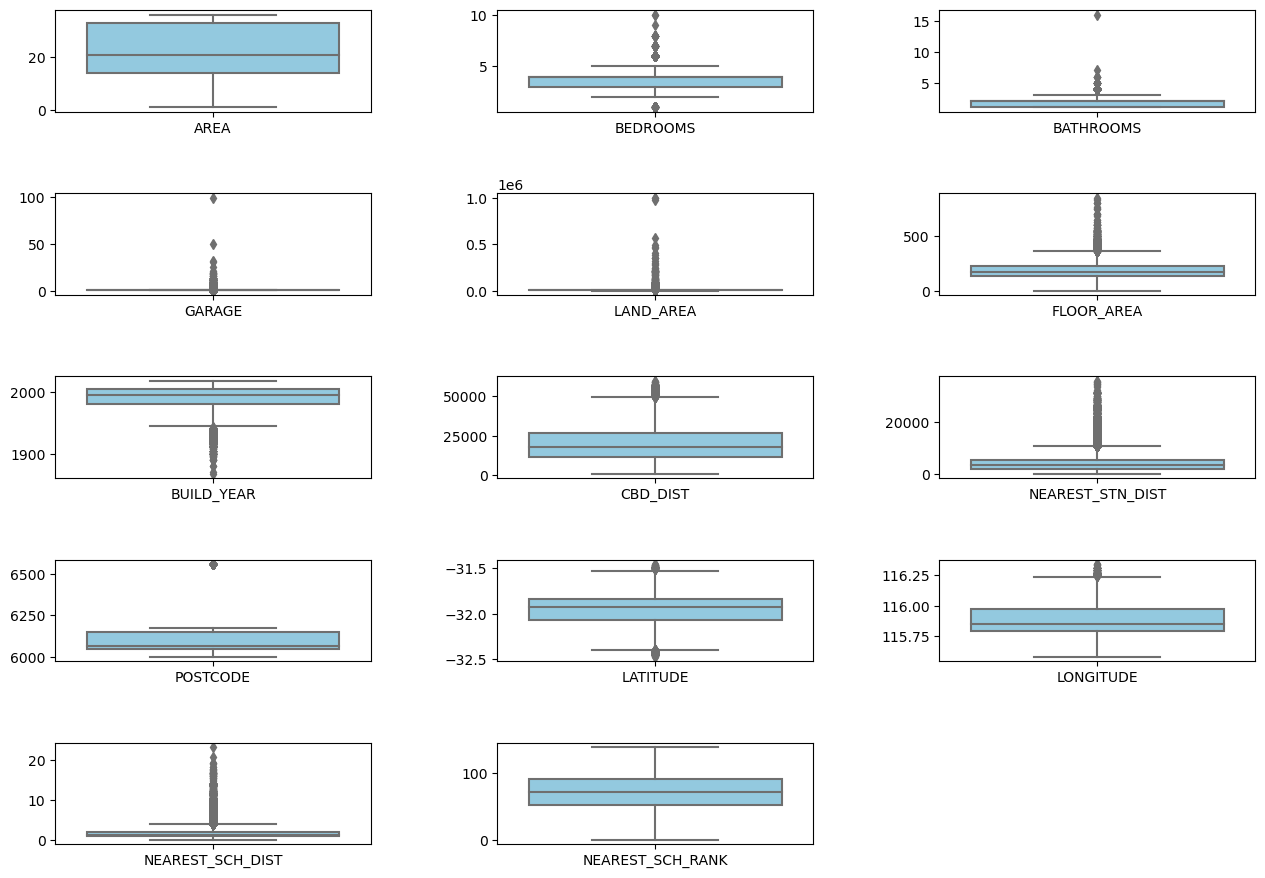

In [39]:
# Melihat Boxplot seebelum dilakukan handling outlier
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i, column in enumerate(X_train.columns, 1):
    ax = plt.subplot(7, 3, i)
    sns.boxplot(X_train[column], color='skyblue')
    
    # Mengatur nama pada sumbu x (x-axis label)
    ax.set_xticklabels([column], rotation=0)  # Menggunakan nama kolom sebagai label sumbu x

plt.show()

**INSIGHT:**
-   Pada grafik bloxplot diatas didapatkan bahwa column yang memiliki outlier yang ditandai dengan titik-titik hitam pada batas atas dan batas bawah pada boxplot :
    -   'BEDROOMS' 
    -   'BATHROOMS'
    -   'GARAGE'
    -   'LAND_AREA'
    -   'FLOOR_AREA'
    -   'BUILD_YEAR'
    -   'CBD_DIST'
    -   'NEAREST_STN_DIST'
    -   'CASH_ADVANCE_TRX'
    -   'POSTCODE'
    -   'LATITUDE'
    -   'LONGITUDE'
    -   'NEAREST_SCH_DIST'
-   Dan column yang tidak memiliki outlier adalah :
    -   'AREA'
    -   'NEAREST_SCH_RANK'
-   Selain itu dapat dijelaskan bahwa data yang memiliki distribusi normal adalah 'AREA', 'BEDROOMS', 'LATITUDE', 'NEAREST_SCH_RANK'. Sedangkan sisa column lainnya memiliki distribusi data yang skew. Hal ini dibuktikan dengan melihat nilai skew dari masing-masing column. Jika hasil skew > 0.05 maka data memiliki distribusi yang skew. Sebaliknya jika hasil skew < 0.05 maka data memiliki distribusi yang normal.
-   Untuk melakukan Handling Outlier, saya akan melakukan metode capping dengan Gaussian bagi data berdistribusi normal dan IQR bagi data berdistribusi skew pada pipeline

## Feature Selection

### Membagi Categorical dan Numerical Data Pada X_train

In [40]:
# Membuat categorical data pada x train 
categorical_X_train = X_train[['AREA','POSTCODE','NEAREST_SCH_RANK']]

# Membuat numerical data pada x train 
numerical_X_train = X_train[['BEDROOMS','BATHROOMS','GARAGE','LAND_AREA', 'FLOOR_AREA', "BUILD_YEAR",'CBD_DIST','NEAREST_STN_DIST','LATITUDE',	
                                'LONGITUDE', 'NEAREST_SCH_DIST']]

# Membuat dataframe pada y train untuk dijadikan target
target_variable_df=pd.DataFrame(y_train)

### Melihat Korelasi Numeric dengan Numeric Dengan Spearman

**NOTES :**

-    Korelasi Spearman adalah metode statistik yang digunakan untuk mengukur kekuatan dan arah hubungan antara dua variabel acak. Metode ini adalah salah satu teknik analisis korelasi non-parametrik yang mengukur hubungan monotonic (tak tentu arah) antara variabel-variabel tersebut.

-   Koefisien korelasi Spearman berkisar dari -1 hingga 1:
    -   Jika nilai korelasi = 1. Menunjukkan hubungan positif sempurna antara variabel feature dengan variabel target. Ketika variabel feature meningkat, variabel target juga meningkat secara linear.
    -   Jika nilai korelasi = -1. Menunjukkan hubungan negatif sempurna antara variabel feature dengan variabel target. Ketika variabel feature meningkat, variabel target menurun secara linear.
    -   Jika nilai korelasi mendekati = 0. Menunjukkan bahwa tidak ada korelasi atau hubungan yang lemah antara variabel feature dengan variabel target.

In [41]:
# Tentukan variabel target kategorikal default payment
target_variable = 'PRICE'

# Loop untuk menguji pointbiserial untuk setiap variabel numerical kecuali variabel target
for column in numerical_X_train.columns:
    if column != target_variable :
        # Membuat tabel kontingensi antara variabel target dan variabel saat ini
        korelasi, p_value = spearmanr(target_variable_df[target_variable], numerical_X_train[column])
        
        # Menampilkan hasil uji chi-square
        print(f"Spearman Test antara '{target_variable}' dan '{column}':")
        print("Spearman Value:", korelasi)
        print("P-value:", p_value)

        alpha = 0.05
        if p_value < alpha:
            print(f'Terdapat Pengaruh Signifikan antara {column} dengan {target_variable}')
        else :
            print(f'Tidak ada pengaruh yang signifikan')
        
        print("--"*50)


Spearman Test antara 'PRICE' dan 'BEDROOMS':
Spearman Value: 0.29293864248703205
P-value: 0.0
Terdapat Pengaruh Signifikan antara BEDROOMS dengan PRICE
----------------------------------------------------------------------------------------------------
Spearman Test antara 'PRICE' dan 'BATHROOMS':
Spearman Value: 0.3792971744104542
P-value: 0.0
Terdapat Pengaruh Signifikan antara BATHROOMS dengan PRICE
----------------------------------------------------------------------------------------------------
Spearman Test antara 'PRICE' dan 'GARAGE':
Spearman Value: 0.2429961326722822
P-value: 0.0
Terdapat Pengaruh Signifikan antara GARAGE dengan PRICE
----------------------------------------------------------------------------------------------------
Spearman Test antara 'PRICE' dan 'LAND_AREA':
Spearman Value: 0.14767278484008084
P-value: 4.170954550032344e-131
Terdapat Pengaruh Signifikan antara LAND_AREA dengan PRICE
------------------------------------------------------------------------

**INSIGHT :**

-   Pada nilai korelasi spearman terlihat pada nilai P-Value = 0.00 dibawah dari alpha 0.05 Sehingga dapat dikatakan secara statistik bahwa nilai feature memiliki pengaruh terhadap price. Feature-Feature tersebut adalah :
    -   BEDROOMS	
    -   BATHROOMS	
    -   GARAGE	
    -   LAND_AREA	
    -   FLOOR_AREA	
    -   CBD_DIST	
    -   NEAREST_STN_DIST	
    -   POSTCODE	
    -   LATITUDE	
    -   LONGITUDE		
-   Pada nilai korelasi spearman terlihat pada nilai P-Value yang lebih dari alpha 0.05 Sehingga dapat dikatakan secara statistik bahwa nilai feature tidak memiliki pengaruh terhadap price. Feature tersebut adalah :
    -   NEAREST_SCH_DIST
-   Walaupun nilai korelasi spearman, bisa dikatakan kecil tetapi p-value secara statistik membuktikan bahwa adanya pengaruh secara statistik. Sehingga saya akan memakai column-column selain NEAREST_SCH_DIST sebagai feature.

### Melihat Korelasi Categorical dengan Numeric Dengan Chi-square

**NOTES :**

-   Chi-square adalah sebuah uji statistik yang digunakan untuk menentukan apakah ada hubungan signifikan antara dua variabel kategori pada data yang diberikan. 

-   P-value dalam uji Chi-square adalah ukuran statistik yang memberitahu seberapa signifikan hasil uji tersebut. 

    -   P-Value < Alpha (Tingkat Signifikansi): Jika nilai P-Value lebih kecil dari tingkat signifikansi yang ditetapkan (saya menggunakan 0,05), maka hasil uji dianggap signifikan secara statistik.Sehingga adanya pengaruh antara variabel dependen dengan variabel independen
    
    -   P-Value > Alpha (Tingkat Signifikansi): Jika nilai P-Value lebih besar dari tingkat signifikansi yang ditetapkan (saya menggunakan 0,05), maka hasil uji dianggap tidak signifikan secara statistik. Sehingga tidak adanya pengaruh antara variabel dependen dengan variabel independen

In [42]:
# Tentukan variabel target kategorikal default payment
target_variable = 'PRICE'

# Loop untuk menguji chi-square untuk setiap variabel kategorikal kecuali variabel target
for column in categorical_X_train.columns:
    if column != target_variable :
        # Membuat tabel kontingensi antara variabel target dan variabel saat ini
        contingency_table = pd.crosstab(target_variable_df[target_variable], categorical_X_train[column])
        
        # Melakukan uji chi-square
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Menampilkan hasil uji chi-square
        print(f"Chi-Square Test antara '{target_variable}' dan '{column}':")
        print("P-value:", p)

        alpha = 0.05
        if p < alpha:
            print(f'Terdapat Pengaruh Signifikan anatara {column} dengan {target_variable}')
        else :
            print(f'Tidak ada pengaruh yang signifikan')
        print("--"*50)

Chi-Square Test antara 'PRICE' dan 'AREA':
P-value: 0.0
Terdapat Pengaruh Signifikan anatara AREA dengan PRICE
----------------------------------------------------------------------------------------------------
Chi-Square Test antara 'PRICE' dan 'POSTCODE':
P-value: 0.0
Terdapat Pengaruh Signifikan anatara POSTCODE dengan PRICE
----------------------------------------------------------------------------------------------------
Chi-Square Test antara 'PRICE' dan 'NEAREST_SCH_RANK':
P-value: 0.0
Terdapat Pengaruh Signifikan anatara NEAREST_SCH_RANK dengan PRICE
----------------------------------------------------------------------------------------------------


**INSIGHT :**

-   Pada nilai korelasi chi-square terlihat pada nilai P-Value = 0.00 dibawah dari alpha 0.05 Sehingga dapat dikatakan secara statistik bahwa nilai feature memiliki pengaruh terhadap price. Feature-Feature tersebut adalah :
    -   AREA	
    -   POSTCODE	
    -   Nearest_SCH_RANK
-   p-value secara statistik membuktikan bahwa adanya pengaruh anatara variabel feature dengan variabel target. Sehingga saya akan memakai column AREA DAN POSTCODE sebagai feature.

### Kesimpulan Feature Selection

-   Kolom yang akan digunakan menjadi feature adalah :
    -   BEDROOMS	
    -   BATHROOMS	
    -   GARAGE	
    -   LAND_AREA	
    -   FLOOR_AREA	
    -   CBD_DIST	
    -   NEAREST_STN_DIST	
    -   POSTCODE	
    -   LATITUDE	
    -   LONGITUDE		
    -   NEAREST_SCH_RANK
    -   AREA
    -   POSTCODE

### Mempersiapkan Data Sesuai Feature Selection

In [43]:
# Mempersiapkan data yang sudah terseleksi
X_train_selected = X_train[['AREA','POSTCODE','BEDROOMS','BATHROOMS','GARAGE','LAND_AREA', 'FLOOR_AREA', "BUILD_YEAR",'CBD_DIST','NEAREST_STN_DIST','LATITUDE',	
                                'LONGITUDE', 'NEAREST_SCH_RANK']]
X_test_selected = X_test[['AREA','POSTCODE','BEDROOMS','BATHROOMS','GARAGE','LAND_AREA', 'FLOOR_AREA', "BUILD_YEAR",'CBD_DIST','NEAREST_STN_DIST','LATITUDE',	
                                'LONGITUDE', 'NEAREST_SCH_RANK']]

# Menghapus Nilai Desimal Pada Garage 
X_train_selected['GARAGE'] = X_train_selected['GARAGE'].astype(int)
X_test_selected['GARAGE'] = X_test_selected['GARAGE'].astype(int)

# Menghapus Nilai Desimal Pada Nearest Sch Rank
X_train_selected['NEAREST_SCH_RANK'] = X_train_selected['NEAREST_SCH_RANK'].astype(int)
X_test_selected['NEAREST_SCH_RANK'] = X_test_selected['NEAREST_SCH_RANK'].astype(int)

X_train_selected.head(5)


C:\Users\Guardian\AppData\Local\Temp\ipykernel_12060\3681548869.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Guardian\AppData\Local\Temp\ipykernel_12060\3681548869.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Guardian\AppData\Local\Temp\ipykernel_12060\3681548869.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,AREA,POSTCODE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_RANK
24255,21,6082,3,2,2,2001,122,2001.0,34100,19600,-31.866960,116.205830,105
9506,36,6065,4,2,4,619,205,2006.0,16300,5000,-31.807020,115.833860,50
10712,21,6556,3,1,2,1214,107,1936.0,39800,25300,-31.860540,116.265830,105
31370,19,6163,4,2,2,769,180,1978.0,12600,3200,-32.060130,115.817260,72
24716,1,6112,4,2,6,2688,291,1984.0,26200,1800,-32.138684,116.029077,72


### Melakukan Check Variance Inflation Factor(VIF)

**NOTES :**

-   Variance Inflation Factor (VIF) adalah ukuran yang digunakan dalam analisis untuk mengevaluasi sejauh mana variabilitas suatu variabel independen dapat dijelaskan oleh variabel independen lain dalam model. VIF digunakan untuk mendeteksi multikolinearitas yaitu kondisi dimana dua atau lebih variabel independen dalam model regresi berkorelasi tinggi satu sama lain.

-   Jika VIF = 1: Tidak ada multikolinearitas. Variabel tidak berkorelasi dengan variabel independen lainnya.
-   Jika VIF > 1 dan < 5: Multikolinearitas sedang. Variabel memiliki tingkat korelasi yang cukup tinggi dengan variabel independen lainnya.
-   Jika VIF ≥ 5: Multikolinearitas tinggi. Variabel berkorelasi sangat tinggi dengan variabel independen lainnya. Nilai VIF yang tinggi (biasanya lebih dari 10) adalah tanda bahwa variabel tersebut memiliki masalah multikolinearitas serius dan harus diperhatikan

In [44]:
# Membuat fungsi untuk menghitung Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = vif["VIF"].round(1)
    return(vif)

# Define kolom yang dibutuhkan
data_VIF = X_train_selected


# Check Multicolinearity in X
calc_vif(data_VIF)

,variables,VIF
0,AREA,5.9
1,POSTCODE,18305.5
2,BEDROOMS,41.3
3,BATHROOMS,19.1
4,GARAGE,3.8
5,LAND_AREA,1.1
6,FLOOR_AREA,12.6
7,BUILD_YEAR,12091.0
8,CBD_DIST,6.7
9,NEAREST_STN_DIST,3.1


**INSIGHT :**
-   Didapatkan bahwa nilai VIF > 5 didapatkan oleh mayoritas variabel diatas. Sehingga hal ini mengindikasi bahwa multikolinearitas variabel-variabel terhadap variabel feature lainnya tinggi. Sehingga saya akan memutuskan untuk tidak mengikut sertakan variabel yang memiliki nilai VIF yang sangat tinggi dalam data feature. dan kembali mengecek nilai VIF kembali.

In [45]:
# Menghitung nilai VIF tanpa pay_5
data_VIF2 = X_train_selected[['AREA','NEAREST_STN_DIST','CBD_DIST','FLOOR_AREA','LAND_AREA']]
calc_vif(data_VIF2)

,variables,VIF
0,AREA,3.9
1,NEAREST_STN_DIST,2.7
2,CBD_DIST,4.4
3,FLOOR_AREA,3.9
4,LAND_AREA,1.1


**INSIGHT :**
-   Didapatkan pada nilai VIF daiatas tidak ada variabel yang memiliki nilai VIF > 5. Sehingga hal ini menunjukkan multikolinearitas pada tiap feature rendah.
-   Saya tetap memasukan FLOOR_AREA dikarenakan, saya melakukan pembulatan kebelakang dimana 5.03 menjadi 5.0 Selain itu pertimbangan saya juga pada nilai korelasi spearman FLOOR_AREA merupakan terbesar dibanding feature-feature lain.

In [46]:
# Memilih feature yang digunakan kembali
X_train = X_train_selected[['AREA','NEAREST_STN_DIST','CBD_DIST','FLOOR_AREA','LAND_AREA']]
X_test = X_test_selected[['AREA','NEAREST_STN_DIST','CBD_DIST','FLOOR_AREA','LAND_AREA']]

## Membuat Pipeline untuk Preprocessing

> Pipeline preprocessing berguna untuk menyatukan semua proses pada preprocessing menjadi 1. Pipeline memastikan bahwa setiap langkah preprocessing hanya diterapkan pada data pelatihan dan validasi secara terpisah, mengurangi risiko kebocoran data (data leakage).

### Memasukan langkah-langkah yang akan digunakan pada preprocessing menggunakan `pipeline`.

In [47]:
# define kolom numerik yang akan di proses pada numerik features
numeric_features = ['NEAREST_STN_DIST','CBD_DIST','FLOOR_AREA','LAND_AREA']

# membuat numeric transformer pipeline
# membuat numeric transformer pipeline
numeric_transformer = Pipeline(steps=[('winsorizer iqr', Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['NEAREST_STN_DIST','CBD_DIST','FLOOR_AREA','LAND_AREA'])), 
                                      ('scaler', MinMaxScaler())])

# Define categorical features
categorical_features = ['AREA']

# ordinal transformer pipeline
categorical_transformer = Pipeline([('passthrough', None)])

### Menyatukan semua transformer menjadi column transformer dan dimasukan ke variabel bernama preprocessor

In [48]:
#ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
        ('Numerical', numeric_transformer, numeric_features),
        ('Categorical', 'passthrough', categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('winsorizer iqr',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both',
                                                             variables=['NEAREST_STN_DIST',
                                                                        'CBD_DIST',
                                                                        'FLOOR_AREA',
                                                                        'LAND_AREA'])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['NEAREST_STN_DIST', 'CBD_DIST', 'FLOOR_AREA',
                                  'LAND_AREA']),
                                ('Categorical', 'passthrough', ['AREA'])])

Berhasil untuk membuat pipeline Column Transformer untuk preprocessing, Prosesnya adalah untuk data numerikal akan dilakukan hadling outlier dimana data-data numerical berdistribusi skew jika dilihat dari nilai skew pada check outlier, sehingga akan dilakukan hadling dengan metode capping menggunakan iqr setelah itu akan dilakukan scaling menggunakan MinMaxScaler. Untuk Kolom Kategorikal tidak ada proses encoding karena data nya sudah berbentuk angka.

# 6. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Pada tahap kali ini saya akan menggunakan 7 model:

- KNN Regressor

    -   KNN Regressor adalah salah satu algoritma pembelajaran mesin yang digunakan untuk regresi. Dalam regresi, KNN digunakan untuk memprediksi nilai kontinu berdasarkan nilai-nilai dari neighbor terdekatnya dalam ruang fitur.

    -   Paramater Default :

        -   n_neighbors : 5

        -   algorithm : 5

        -   leaf_size : 30

        -   p : 2
    
- SVR (Support Vector Reggresor)

    -   Support Vector Regressor (SVR) adalah algoritma pembelajaran mesin yang digunakan untuk regresi. Tujuannya adalah untuk memprediksi nilai kontinu berdasarkan data train yang diberikan. SVR mencoba membangun sebuah hyperplane yang memiliki margin sebesar mungkin dan pada saat yang sama meminimalkan kesalahan prediksi.

    -   Paramater Default :

        -   kernel : rbf

        -   C (parameter penalty) : 1.0. 

        -   degree : 3

        -   gamma: auto

- DecisionTree Regressor

    -   Decision Tree Regressor adalah algoritma pembelajaran mesin yang digunakan untuk regresi. Tujuannya adalah membangun pohon keputusan dari data train, di mana setiap node dalam pohon mewakili suatu tes pada fitur (atribut) dan setiap cabang dari node mewakili hasil dari tes tersebut.

    -   Paramater Default :

        -   criterion: : mse

        -   splitter : best

        -   max_depth : none

        -   min_samples_split: 2

        -   min_samples_leaf : 1

- RandomForest Regressor

    -   Random Forest Regressor adalah algoritma pembelajaran mesin yang menggunakan ensambel dari Decision Trees untuk regresi. Algoritma ini membangun beberapa pohon keputusan selama pelatihan dan menggabungkan hasil prediksi dari pohon-pohon tersebut untuk memprediksi nilai kontinu.

    -   Paramater Default :

        -   n_estimators: : 100

        -   max_depth : 2

        -   min_samples_split : 2

        -   min_samples_leaf: 1
        
        -   bootstrap : True

- AdaBoost Regressor

    -   AdaBoost Regressor adalah algoritma pembelajaran mesin yang menggunakan ensambel (ensemble) dari model lemah untuk regresi. Algoritma ini bekerja dengan cara memberikan bobot lebih kepada sampel data yang sulit diprediksi oleh model sebelumnya, sehingga fokus pada meningkatkan akurasi pada sampel-sampel yang sulit diprediksi.

    -   Paramater Default :

        -   base_estimator : None

        -   n_estimators : 50

        -   learning_rate : 1

- Linear Regression

    -   Linear Regression adalah salah satu algoritma pembelajaran mesin yang digunakan untuk regresi. Tujuannya adalah untuk memodelkan hubungan linier antara variabel feature dan variabel. Dalam  linear reggresion mencoba menemukan garis lurus terbaik yang menggambarkan hubungan antara variabel input dan variabel target.

    -   Paramater Default :

        -   fit_intercept : True

        -   normalize : False

- SGD Regressor

    -   SGD Regressor (Stochastic Gradient Descent Regressor) adalah algoritma pembelajaran mesin yang digunakan untuk regresi. Algoritma ini adalah varian dari regresi linier yang menggunakan metode optimisasi Stochastic Gradient Descent (SGD) untuk menemukan model regresi yang optimal. SGD Regressor cocok dalam menangani dataset yang besar karena mengoptimalkan fungsi tujuannya menggunakan subset kecil dari data pada setiap langkah iterasi.

    -   Paramater Default :

        -   penalty : l2

        -   alpha :  0.0001

        -   max_iter : 1000

        -   l1_ratio : 0.15


### Membuat pipeline untuk masing-masing model

In [49]:
#pipeline untuk linear regression
pipe_linreg = Pipeline([('transormer', preprocessor),
                        ('regressor', LinearRegression())])

#pipeline untuk KNN
pipe_knn = Pipeline([('transormer', preprocessor),
                     ('regressor', KNeighborsRegressor())])

#pipeline untuk decision tree regressor
pipe_dtr = Pipeline([('transormer', preprocessor),
                     ('regressor', DecisionTreeRegressor())])

#pipeline untuk adaboost regressor
pipe_abr = Pipeline([('transormer', preprocessor),
                     ('regressor', AdaBoostRegressor())])

#pipeline untuk random forest regressor
pipe_rfr = Pipeline([('transormer', preprocessor),
                     ('regressor', RandomForestRegressor())])

#pipeline untuk support vectore regressor
pipe_svr = Pipeline([('transormer', preprocessor),
                     ('regressor', SVR())])

#pipeline untuk SGD Regressor
pipe_sgd = Pipeline([('transormer', preprocessor),
                     ('regressor', SGDRegressor())])

In [50]:
# Melihat pipeline untuk linear regression
pipe_linreg

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['NEAREST_STN_DIST',
                                                                                         'CBD_DIST',
                                                                                         'FLOOR_AREA',
                                                                                         'LAND_AREA'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['NEAREST_STN_DIST',
                                                   'CBD_DIST', 'FLOOR_AREA',
                                                   'LAND_AREA']),
                                                 ('Categorical', 'passthrough',
                                                  ['AREA'])])),
                ('regressor', LinearRegression())])

In [51]:
# Melihat pipeline untuk KNN
pipe_knn

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['NEAREST_STN_DIST',
                                                                                         'CBD_DIST',
                                                                                         'FLOOR_AREA',
                                                                                         'LAND_AREA'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['NEAREST_STN_DIST',
                                                   'CBD_DIST', 'FLOOR_AREA',
                                                   'LAND_AREA']),
                                                 ('Categorical', 'passthrough',
                                                  ['AREA'])])),
                ('regressor', KNeighborsRegressor())])

# 7. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Base Model Evaluation

### Linear Reggresion

In [52]:
pipe_linreg.fit(X_train,y_train)

# Menghitung prediksi untuk data latih dan data uji
y_train_linreg = pipe_linreg.predict(X_train)
y_test_linreg = pipe_linreg.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_linreg)
mae_test = mean_absolute_error(y_test, y_test_linreg)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_linreg)
r2_test = r2_score(y_test, y_test_linreg)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_linreg))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_linreg))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_linreg))
print("MSE - Test Set",mean_squared_error(y_test,y_test_linreg))

MAE - Train set: 180355.87344638165
MAE - Test set: 182480.30045523943
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: 0.4508348043824689
R-squared - Test set: 0.45905374939924715
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 262471.206975348
RMSE - Test set: 266458.59246918134
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 68891134491.09596
MSE - Test Set 71000181500.65727


**INSIGHT:**
-   Mean Absolute Error (MAE):

    -   Pada MAE pada data train adalah sekitar 180,355.87, yang berarti rata-rata kesalahan prediksi model pada data train adalah sekitar 180,355.87 AUD dalam satuan mata uang yang digunakan.

    -   Pada MAE pada data test adalah sekitar 182,480.30, yang berarti rata-rata kesalahan prediksi model pada data test adalah sekitar 182,480.30 AUD

    -   Dalam hal ini, MAE mengindikasikan bahwa prediksi harga rumah memiliki rata-rata kesalahan sekitar 180,000 AUD hingga 182,000 AUD dari nilai sebenarnya.

-   Coefficient of Determination (R-squared):

    -   R-squared pada data train adalah sekitar 0.45, yang berarti sekitar 45% variabilitas dalam harga rumah pada data train dapat dijelaskan oleh fitur-fitur yang digunakan dalam model

    -   R-squared pada data test adalah sekitar 0.46, yang berarti sekitar 46% variabilitas dalam harga rumah pada data test dapat dijelaskan oleh model.

    -   R-squared memberikan gambaran tentang sejauh mana model dapat menjelaskan variasi dalam data. Dalam kasus ini, sekitar 45-46% variasi dalam harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan dalam model.

-   Root Mean Squared Error (RMSE):

    -   RMSE pada data train adalah sekitar 262,471.21, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 262,471.21 AUD dari nilai sebenarnya pada data train.

    -   RMSE pada data test adalah sekitar 266,458.59, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 266,458.59 AUD dari nilai sebenarnya pada data test.

    -   RMSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Dalam kasus ini, prediksi harga rumah memiliki kesalahan rata-rata sekitar 262,000 AUD hingga 266,000 AUD dari nilai sebenarnya.

-   Mean Squared Error (MSE):

    -   MSE pada data train adalah sekitar 68,891,134,491.10, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data train.

    -   MSE pada data test adalah sekitar 71,000,181,500.66, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data test.
    
    -   MSE memberikan informasi serupa dengan RMSE, tetapi dalam bentuk nilai kuadrat dari unit asal data. Semakin kecil nilai MSE, semakin baik performa model.

### KNN 

In [53]:
pipe_knn.fit(X_train,y_train)

# Menghitung prediksi untuk data latih dan data uji
y_train_knn = pipe_knn.predict(X_train)
y_test_knn = pipe_knn.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_knn)
mae_test = mean_absolute_error(y_test, y_test_knn)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_knn)
r2_test = r2_score(y_test, y_test_knn)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_knn))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_knn))
print("MSE - Test Set",mean_squared_error(y_test,y_test_knn))

MAE - Train set: 91413.62007131185
MAE - Test set: 113773.82739156269
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: 0.8163286146383127
R-squared - Test set: 0.7281715098832098
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 151792.71069725603
RMSE - Test set: 188886.16903633662
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 23041027020.820866
MSE - Test Set 35677984853.22353


**INSIGHT:**
-   Mean Absolute Error (MAE):

    -   Pada MAE pada data train adalah sekitar 91,413.62, yang berarti rata-rata kesalahan prediksi model pada data train adalah sekitar 91,413.62 AUD dalam satuan mata uang yang digunakan.

    -   Pada MAE pada data test adalah sekitar 113,773.82, yang berarti rata-rata kesalahan prediksi model pada data test adalah sekitar 113,773.82 AUD

    -   Dalam hal ini, MAE mengindikasikan bahwa prediksi harga rumah memiliki rata-rata kesalahan sekitar 91,000 AUD hingga 113,000 AUD dari nilai sebenarnya.

-   Coefficient of Determination (R-squared):

    -   R-squared pada data train adalah sekitar 0.81, yang berarti sekitar 81% variabilitas dalam harga rumah pada data train dapat dijelaskan oleh fitur-fitur yang digunakan dalam model

    -   R-squared pada data test adalah sekitar 0.72, yang berarti sekitar 72% variabilitas dalam harga rumah pada data test dapat dijelaskan oleh model.

    -   R-squared memberikan gambaran tentang sejauh mana model dapat menjelaskan variasi dalam data. Dalam kasus ini, sekitar 45-46% variasi dalam harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan dalam model.

-   Root Mean Squared Error (RMSE):

    -   RMSE pada data train adalah sekitar 151,792.71, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 151,792.71 AUD dari nilai sebenarnya pada data train.

    -   RMSE pada data test adalah sekitar 188,886.16, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 188,886.16 AUD dari nilai sebenarnya pada data test.

    -   RMSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Dalam kasus ini, prediksi harga rumah memiliki kesalahan rata-rata sekitar 151,000 AUD hingga 266,000 AUD dari nilai sebenarnya.

-   Mean Squared Error (MSE):

    -   MSE pada data train adalah sekitar 23,041,027,020.82, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data train.

    -   MSE pada data test adalah sekitar 35,677,984,853.22, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data test.
    
    -   MSE memberikan informasi serupa dengan RMSE, tetapi dalam bentuk nilai kuadrat dari unit asal data. Semakin kecil nilai MSE, semakin baik performa model.

### Decission Tree

In [54]:
pipe_dtr.fit(X_train,y_train)

# Menghitung prediksi untuk data latih dan data uji
y_train_dtr = pipe_dtr.predict(X_train)
y_test_dtr = pipe_dtr.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_dtr)
mae_test = mean_absolute_error(y_test, y_test_dtr)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_dtr)
r2_test = r2_score(y_test, y_test_dtr)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_dtr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_dtr))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_dtr))
print("MSE - Test Set",mean_squared_error(y_test,y_test_dtr))

MAE - Train set: 133.63066409151685
MAE - Test set: 149187.59350861557
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: 0.9999194664993272
R-squared - Test set: 0.5292479413919475
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 3178.4724728861293
RMSE - Test set: 248570.04212542725
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 10102687.260894865
MSE - Test Set 61787065842.23667


**INSIGHT:**
-   Mean Absolute Error (MAE):

    -   Pada MAE pada data train adalah sekitar 133.63, yang berarti rata-rata kesalahan prediksi model pada data train adalah sekitar 133.63 AUD dalam satuan mata uang yang digunakan.

    -   Pada MAE pada data test adalah sekitar 149.400.93, yang berarti rata-rata kesalahan prediksi model pada data test adalah sekitar 149.400.93 AUD

    -   Dalam hal ini, MAE mengindikasikan bahwa prediksi harga rumah memiliki rata-rata kesalahan sekitar 133 AUD hingga 149,000 AUD dari nilai sebenarnya.

-   Coefficient of Determination (R-squared):

    -   R-squared pada data train adalah sekitar 0.99, yang berarti sekitar 99% variabilitas dalam harga rumah pada data train dapat dijelaskan oleh fitur-fitur yang digunakan dalam model

    -   R-squared pada data test adalah sekitar 0.52, yang berarti sekitar 52% variabilitas dalam harga rumah pada data test dapat dijelaskan oleh model.

    -   R-squared memberikan gambaran tentang sejauh mana model dapat menjelaskan variasi dalam data. Dalam kasus ini, sekitar 52-99% variasi dalam harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan dalam model.

-   Root Mean Squared Error (RMSE):

    -   RMSE pada data train adalah sekitar 3178, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 3178 AUD dari nilai sebenarnya pada data train.

    -   RMSE pada data test adalah sekitar 248.739.06, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 248.739.06 AUD dari nilai sebenarnya pada data test.

    -   RMSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Dalam kasus ini, prediksi harga rumah memiliki kesalahan rata-rata sekitar 3178 AUD hingga 249.739 AUD dari nilai sebenarnya.

-   Mean Squared Error (MSE):

    -   MSE pada data train adalah sekitar 10.102.687.26, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data train.

    -   MSE pada data test adalah sekitar 61.871.120.551.81, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data test.
    
    -   MSE memberikan informasi serupa dengan RMSE, tetapi dalam bentuk nilai kuadrat dari unit asal data. Semakin kecil nilai MSE, semakin baik performa model.

### ADA Boost Regressor

In [55]:
pipe_abr.fit(X_train,y_train)

# Menghitung prediksi untuk data latih dan data uji
y_train_abr = pipe_abr.predict(X_train)
y_test_abr = pipe_abr.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_abr)
mae_test = mean_absolute_error(y_test, y_test_abr)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_abr)
r2_test = r2_score(y_test, y_test_abr)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_abr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_abr))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_abr))
print("MSE - Test Set",mean_squared_error(y_test,y_test_abr))

MAE - Train set: 240286.8902654452
MAE - Test set: 243040.6070424223
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: 0.280616993416547
R-squared - Test set: 0.28683958102801954
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 300407.14166592713
RMSE - Test set: 305947.062470687
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 90244450763.89243
MSE - Test Set 93603605034.44244


**INSIGHT:**
-   Mean Absolute Error (MAE):

    -   Pada MAE pada data train adalah sekitar 228.612.07, yang berarti rata-rata kesalahan prediksi model pada data train adalah sekitar 228.612.07 AUD dalam satuan mata uang yang digunakan.

    -   Pada MAE pada data test adalah sekitar 230.923.94, yang berarti rata-rata kesalahan prediksi model pada data test adalah sekitar 230.923.94 AUD

    -   Dalam hal ini, MAE mengindikasikan bahwa prediksi harga rumah memiliki rata-rata kesalahan sekitar 228,000 AUD hingga 230,000 AUD dari nilai sebenarnya.

-   Coefficient of Determination (R-squared):

    -   R-squared pada data train adalah sekitar 0.33, yang berarti sekitar 33% variabilitas dalam harga rumah pada data train dapat dijelaskan oleh fitur-fitur yang digunakan dalam model

    -   R-squared pada data test adalah sekitar 0.34, yang berarti sekitar 34% variabilitas dalam harga rumah pada data test dapat dijelaskan oleh model.

    -   R-squared memberikan gambaran tentang sejauh mana model dapat menjelaskan variasi dalam data. Dalam kasus ini, sekitar 33-34% variasi dalam harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan dalam model.

-   Root Mean Squared Error (RMSE):

    -   RMSE pada data train adalah sekitar 287.832.75, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 287.832.75 AUD dari nilai sebenarnya pada data train.

    -   RMSE pada data test adalah sekitar 293.035.14, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 293.035.14 AUD dari nilai sebenarnya pada data test.

    -   RMSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Dalam kasus ini, prediksi harga rumah memiliki kesalahan rata-rata sekitar 287.000 AUD hingga 293.000 AUD dari nilai sebenarnya.

-   Mean Squared Error (MSE):

    -   MSE pada data train adalah sekitar 82.847.696.504.28, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data train.

    -   MSE pada data test adalah sekitar 85.869.596.679.64, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data test.
    
    -   MSE memberikan informasi serupa dengan RMSE, tetapi dalam bentuk nilai kuadrat dari unit asal data. Semakin kecil nilai MSE, semakin baik performa model.

### Random Forest Regressor

In [56]:
pipe_rfr.fit(X_train,y_train)

# Menghitung prediksi untuk data latih dan data uji
y_train_rfr = pipe_rfr.predict(X_train)
y_test_rfr = pipe_rfr.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_rfr)
mae_test = mean_absolute_error(y_test, y_test_rfr)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_rfr)
r2_test = r2_score(y_test, y_test_rfr)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_rfr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_rfr))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_rfr))
print("MSE - Test Set",mean_squared_error(y_test,y_test_rfr))

MAE - Train set: 40278.04194710774
MAE - Test set: 109472.3774456835
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: 0.9639943419634044
R-squared - Test set: 0.7548756601406775
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 67207.15974591243
RMSE - Test set: 179368.38197415858
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 4516802321.112593
MSE - Test Set 32173016452.027653


**INSIGHT:**
-   Mean Absolute Error (MAE):

    -   Pada MAE pada data train adalah sekitar 40.208.60, yang berarti rata-rata kesalahan prediksi model pada data train adalah sekitar 40.208.60 AUD dalam satuan mata uang yang digunakan.

    -   Pada MAE pada data test adalah sekitar 109.127.34, yang berarti rata-rata kesalahan prediksi model pada data test adalah sekitar 109.127.34 AUD

    -   Dalam hal ini, MAE mengindikasikan bahwa prediksi harga rumah memiliki rata-rata kesalahan sekitar 40.000 AUD hingga 109.000 AUD dari nilai sebenarnya.

-   Coefficient of Determination (R-squared):

    -   R-squared pada data train adalah sekitar 0.96, yang berarti sekitar 96% variabilitas dalam harga rumah pada data pelatihan dapat dijelaskan oleh fitur-fitur yang digunakan dalam model

    -   R-squared pada data test adalah sekitar 0.75, yang berarti sekitar 75% variabilitas dalam harga rumah pada data uji dapat dijelaskan oleh model.

    -   R-squared memberikan gambaran tentang sejauh mana model dapat menjelaskan variasi dalam data. Dalam kasus ini, sekitar 75-96% variasi dalam harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan dalam model.

-   Root Mean Squared Error (RMSE):

    -   RMSE pada data train adalah sekitar 287.832.75, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 287.832.75 AUD dari nilai sebenarnya pada data train.

    -   RMSE pada data test adalah sekitar 293.035.14, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 293.035.14 AUD dari nilai sebenarnya pada data test.

    -   RMSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Dalam kasus ini, prediksi harga rumah memiliki kesalahan rata-rata sekitar 287.000 AUD hingga 293.000 AUD dari nilai sebenarnya.

-   Mean Squared Error (MSE):

    -   MSE pada data train adalah sekitar 4.497.492.695.59, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data train.

    -   MSE pada data test adalah sekitar 31.990.140.943.81, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data test.
    
    -   MSE memberikan informasi serupa dengan RMSE, tetapi dalam bentuk nilai kuadrat dari unit asal data. Semakin kecil nilai MSE, semakin baik performa model.

### SVR

In [57]:
pipe_svr.fit(X_train,y_train)

# Menghitung prediksi untuk data latih dan data uji
y_train_svr = pipe_svr.predict(X_train)
y_test_svr = pipe_svr.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_svr)
mae_test = mean_absolute_error(y_test, y_test_svr)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_svr)
r2_test = r2_score(y_test, y_test_svr)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_svr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_svr))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_svr))
print("MSE - Test Set",mean_squared_error(y_test,y_test_svr))

MAE - Train set: 242169.6677157456
MAE - Test set: 246496.25271552094
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: -0.07745209014950705
R-squared - Test set: -0.07423748998782798
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 367645.4112787171
RMSE - Test set: 375493.8465873165
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 135163148434.29706
MSE - Test Set 140995628824.93918


**INSIGHT:**
-   Mean Absolute Error (MAE):

    -   Pada MAE pada data train adalah sekitar 242.169.66, yang berarti rata-rata kesalahan prediksi model pada data train adalah sekitar 242.169.66 AUD dalam satuan mata uang yang digunakan.

    -   Pada MAE pada data test adalah sekitar 246.496.25, yang berarti rata-rata kesalahan prediksi model pada data test adalah sekitar 246.496.25 AUD

    -   Dalam hal ini, MAE mengindikasikan bahwa prediksi harga rumah memiliki rata-rata kesalahan sekitar 242.000 AUD hingga 246.000 AUD dari nilai sebenarnya.

-   Coefficient of Determination (R-squared):

    -   R-squared pada data train adalah sekitar -0.07, yang berarti model tidak dapat menjelaskan variabilitas dalam harga rumah pada data train oleh fitur-fitur yang digunakan dalam model

    -   R-squared pada data test adalah sekitar -0.07, yang berarti model tidak dapat menjelaskan variabilitas dalam harga rumah pada data test oleh fitur-fitur yang digunakan dalam model.

    -   R-squared memberikan gambaran tentang sejauh mana model dapat menjelaskan variasi dalam data. Dalam kasus ini, r-squared belum dapat menjelaskan variabilitas dalam harga rumah pada data train maupun data test

-   Root Mean Squared Error (RMSE):

    -   RMSE pada data train adalah sekitar 367.645.41, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 367.645.41 AUD dari nilai sebenarnya pada data train.

    -   RMSE pada data test adalah sekitar 375.493.84, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 375.493.84 AUD dari nilai sebenarnya pada data test.

    -   RMSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Dalam kasus ini, prediksi harga rumah memiliki kesalahan rata-rata sekitar 367.000 AUD hingga 375.000 AUD dari nilai sebenarnya.

-   Mean Squared Error (MSE):

    -   MSE pada data pelatihan adalah sekitar 135.163.148.434.29, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data pelatihan.

    -   MSE pada data uji adalah sekitar 140.995.628.824.93, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data uji.
    
    -   MSE memberikan informasi serupa dengan RMSE, tetapi dalam bentuk nilai kuadrat dari unit asal data. Semakin kecil nilai MSE, semakin baik performa model.

### SGD Regressor

In [58]:
pipe_sgd.fit(X_train,y_train)

# Menghitung prediksi untuk data latih dan data uji
y_train_sgd = pipe_sgd.predict(X_train)
y_test_sgd = pipe_sgd.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_sgd)
mae_test = mean_absolute_error(y_test, y_test_sgd)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_sgd)
r2_test = r2_score(y_test, y_test_sgd)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_sgd))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_sgd))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_sgd))
print("MSE - Test Set",mean_squared_error(y_test,y_test_sgd))

MAE - Train set: 180911.65760061814
MAE - Test set: 182667.31967192248
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: 0.414554571654014
R-squared - Test set: 0.42193966532767013
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 271002.548673765
RMSE - Test set: 275447.76762859634
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 73442381387.67635
MSE - Test Set 75871472691.57721


**INSIGHT:**
-   Mean Absolute Error (MAE):

    -   Pada MAE pada data train adalah sekitar 178.161.41, yang berarti rata-rata kesalahan prediksi model pada data train adalah sekitar 178.161.41 AUD dalam satuan mata uang yang digunakan.

    -   Pada MAE pada data test adalah sekitar 179.915.12, yang berarti rata-rata kesalahan prediksi model pada data test adalah sekitar 179.915.12 AUD

    -   Dalam hal ini, MAE mengindikasikan bahwa prediksi harga rumah memiliki rata-rata kesalahan sekitar 178.000 AUD hingga 179.000 AUD dari nilai sebenarnya.

-   Coefficient of Determination (R-squared):

    -   R-squared pada data train adalah sekitar 0.44, yang berarti sekitar 44% variabilitas dalam harga rumah pada data pelatihan dapat dijelaskan oleh fitur-fitur yang digunakan dalam model

    -   R-squared pada data test adalah sekitar 0.44, yang berarti sekitar 44% variabilitas dalam harga rumah pada data uji dapat dijelaskan oleh model.

    -   R-squared memberikan gambaran tentang sejauh mana model dapat menjelaskan variasi dalam data. Dalam kasus ini, sekitar 75-96% variasi dalam harga rumah dapat dijelaskan oleh fitur-fitur yang digunakan dalam model.

-   Root Mean Squared Error (RMSE):

    -   RMSE pada data train adalah sekitar 264.975.58, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 264.975.58 AUD dari nilai sebenarnya pada data train.

    -   RMSE pada data test adalah sekitar 269.236.34, yang berarti prediksi harga rumah memiliki rata-rata kesalahan sekitar 269.236.34 AUD dari nilai sebenarnya pada data test.

    -   RMSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Dalam kasus ini, prediksi harga rumah memiliki kesalahan rata-rata sekitar 264.000 AUD hingga 269.000 AUD dari nilai sebenarnya.

-   Mean Squared Error (MSE):

    -   MSE pada data pelatihan adalah sekitar 70.212.063.023.72, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data pelatihan.

    -   MSE pada data uji adalah sekitar 72.488.209.222.18, yang berarti rata-rata dari kuadrat kesalahan prediksi pada data uji.
    
    -   MSE memberikan informasi serupa dengan RMSE, tetapi dalam bentuk nilai kuadrat dari unit asal data. Semakin kecil nilai MSE, semakin baik performa model.

# 8. Model Evaluations

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Cross Validation

> Cross-validation adalah teknik evaluasi performa model machine learning dengan cara membagi dataset menjadi subset-subset yang lebih kecil, yang disebut fold, dan menguji model pada beberapa kombinasi subset pelatihan dan pengujian. Tujuan dari cross-validation adalah untuk mendapatkan estimasi performa model yang lebih stabil

### Cross Validation Linear Regression

In [59]:
r2_train_cross_val_linreg = cross_val_score(pipe_linreg,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Linear Regression ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_linreg)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_linreg.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_linreg.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_linreg.mean()-r2_train_cross_val_linreg.std()) , '-', (r2_train_cross_val_linreg.mean()+r2_train_cross_val_linreg.std()))

----Cross Validation Linear Regression ---- 
r2 Score - All - Cross Validation  :  [0.45867736 0.45755563 0.45528606 0.44096928 0.43978071]
r2 Score - Mean - Cross Validation :  0.4504538074151351
r2 Score - Std - Cross Validation  :  0.008310051673869423
r2 Score - Range of Test-Set       :  0.44214375574126563 - 0.4587638590890045


**INSIGHT**
-   R-squared Score (R2) pada Cross-Validation:

    -   R-squared score pada setiap lipatan cross-validation adalah: [0.45867736 0.45755563 0.45528606 0.44096928 0.43978071]

    -   R-squared score menunjukkan sejauh mana variabilitas data dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 (model tidak menjelaskan variabilitas sama sekali) hingga 1 (model menjelaskan semua variabilitas data).

-   Rata-rata R-squared Score pada Cross-Validation:

    -   Rata-rata dari R-squared score pada cross-validation adalah: 0.42247230212432374

    -   Rata-rata ini mencerminkan sejauh mana model secara keseluruhan dapat menjelaskan variabilitas dalam data. Dalam hal ini, rata-rata R-squared adalah sekitar 0.42, yang menunjukkan bahwa sekitar 42% variabilitas dalam data dapat dijelaskan oleh model.

-   Standar Deviasi R-squared Score pada Cross-Validation:

    -   Standar deviasi dari R-squared score pada cross-validation adalah: 0.02507716532114571

    -   Standar deviasi mengukur seberapa bervariasi nilai-nilai R-squared di antara lipatan-lipatan cross-validation. Semakin kecil nilai standar deviasi, semakin konsisten performa model pada lipatan-lipatan cross-validation.

-   Rentang (Range) R-squared Score pada Data Uji:

    -   R-squared score pada data uji memiliki rentang dari 0.397395136803178 hingga 0.4475494674454695.
    
    -   Rentang ini menunjukkan variasi performa model pada data uji yang berbeda-beda. Nilai terendah (0.397) dan nilai tertinggi (0.448) dari R-squared score memberikan gambaran tentang sejauh mana model dapat menjelaskan variabilitas dalam dataset yang berbeda. Semakin kecil rentangnya, semakin stabil performa model pada berbagai subset data uji.

### Cross Validation KNN

In [60]:
r2_train_cross_val_knn = cross_val_score(pipe_knn,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation KNN ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_knn)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_knn.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_knn.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_knn.mean()-r2_train_cross_val_knn.std()) , '-', (r2_train_cross_val_knn.mean()+r2_train_cross_val_knn.std()))

----Cross Validation KNN ---- 
r2 Score - All - Cross Validation  :  [0.7229013  0.70668649 0.72609866 0.70798649 0.71347304]
r2 Score - Mean - Cross Validation :  0.7154291970726139
r2 Score - Std - Cross Validation  :  0.007814412916177757
r2 Score - Range of Test-Set       :  0.7076147841564361 - 0.7232436099887917


**INSIGHT**
-   R-squared Score (R2) pada Cross-Validation:

    -   R-squared score pada setiap lipatan cross-validation adalah: [0.7229013  0.70668649 0.72609866 0.70798649 0.71347304]

    -   R-squared score menunjukkan sejauh mana variabilitas data dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 (model tidak menjelaskan variabilitas sama sekali) hingga 1 (model menjelaskan semua variabilitas data).

-   Rata-rata R-squared Score pada Cross-Validation:

    -   Rata-rata dari R-squared score pada cross-validation adalah: 0.7154291970726139

    -   Rata-rata ini mencerminkan sejauh mana model secara keseluruhan dapat menjelaskan variabilitas dalam data. Dalam hal ini, rata-rata R-squared adalah sekitar 0.71, yang menunjukkan bahwa sekitar 71% variabilitas dalam data dapat dijelaskan oleh model.

-   Standar Deviasi R-squared Score pada Cross-Validation:

    -   Standar deviasi dari R-squared score pada cross-validation adalah: 0.007814412916177757

    -   Standar deviasi mengukur seberapa bervariasi nilai-nilai R-squared di antara lipatan-lipatan cross-validation. Semakin kecil nilai standar deviasi, semakin konsisten performa model pada lipatan-lipatan cross-validation.

-   Rentang (Range) R-squared Score pada Data Uji:

    -   R-squared score pada data uji memiliki rentang dari 0.7076147841564361 hingga 0.7232436099887917.
    
    -   Rentang ini menunjukkan variasi performa model pada data uji yang berbeda-beda. Nilai terendah (0.707) dan nilai tertinggi (0.723) dari R-squared score memberikan gambaran tentang sejauh mana model dapat menjelaskan variabilitas dalam dataset yang berbeda. Semakin kecil rentangnya, semakin stabil performa model pada berbagai subset data uji.

### Cross Validation Decission Tree

In [61]:
r2_train_cross_val_dtr = cross_val_score(pipe_dtr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Decission Tree ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_dtr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_dtr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_dtr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_dtr.mean()-r2_train_cross_val_dtr.std()) , '-', (r2_train_cross_val_dtr.mean()+r2_train_cross_val_dtr.std()))

----Cross Validation Decission Tree ---- 
r2 Score - All - Cross Validation  :  [0.48271118 0.49845379 0.51608604 0.51084184 0.51490804]
r2 Score - Mean - Cross Validation :  0.5046001742769626
r2 Score - Std - Cross Validation  :  0.012601917211848857
r2 Score - Range of Test-Set       :  0.49199825706511374 - 0.5172020914888115


**INSIGHT**
-   R-squared Score (R2) pada Cross-Validation:

    -   R-squared score pada setiap lipatan cross-validation adalah: [0.48574568 0.48547307 0.50521316 0.5215048  0.52072707]

    -   R-squared score menunjukkan sejauh mana variabilitas data dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 (model tidak menjelaskan variabilitas sama sekali) hingga 1 (model menjelaskan semua variabilitas data).

-   Rata-rata R-squared Score pada Cross-Validation:

    -   Rata-rata dari R-squared score pada cross-validation adalah: 0.5037327569805756

    -   Rata-rata ini mencerminkan sejauh mana model secara keseluruhan dapat menjelaskan variabilitas dalam data. Dalam hal ini, rata-rata R-squared adalah sekitar 0.50, yang menunjukkan bahwa sekitar 50% variabilitas dalam data dapat dijelaskan oleh model.

-   Standar Deviasi R-squared Score pada Cross-Validation:

    -   Standar deviasi dari R-squared score pada cross-validation adalah: 0.015898396806054975

    -   Standar deviasi mengukur seberapa bervariasi nilai-nilai R-squared di antara lipatan-lipatan cross-validation. Semakin kecil nilai standar deviasi, semakin konsisten performa model pada lipatan-lipatan cross-validation.

-   Rentang (Range) R-squared Score pada Data Uji:

    -   R-squared score pada data uji memiliki rentang dari 0.48783436017452064 hingga 0.5196311537866306.
    
    -   Rentang ini menunjukkan variasi performa model pada data uji yang berbeda-beda. Nilai terendah (0.487) dan nilai tertinggi (0.51) dari R-squared score memberikan gambaran tentang sejauh mana model dapat menjelaskan variabilitas dalam dataset yang berbeda. Semakin kecil rentangnya, semakin stabil performa model pada berbagai subset data uji.

### Cross Validation Ada Boost Regressor

In [62]:
r2_train_cross_val_abr = cross_val_score(pipe_abr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Ada Boost Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_abr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_abr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_abr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_abr.mean()-r2_train_cross_val_abr.std()) , '-', (r2_train_cross_val_abr.mean()+r2_train_cross_val_abr.std()))

----Cross Validation Ada Boost Regressor ---- 
r2 Score - All - Cross Validation  :  [0.37891776 0.27941609 0.24172397 0.22617079 0.42930314]
r2 Score - Mean - Cross Validation :  0.3111063497308602
r2 Score - Std - Cross Validation  :  0.07949981607975709
r2 Score - Range of Test-Set       :  0.23160653365110312 - 0.3906061658106173


**INSIGHT**
-   R-squared Score (R2) pada Cross-Validation:

    -   R-squared score pada setiap lipatan cross-validation adalah: [0.36797814 0.27689034 0.46124509 0.2089608  0.32446347]

    -   R-squared score menunjukkan sejauh mana variabilitas data dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 (model tidak menjelaskan variabilitas sama sekali) hingga 1 (model menjelaskan semua variabilitas data).

-   Rata-rata R-squared Score pada Cross-Validation:

    -   Rata-rata dari R-squared score pada cross-validation adalah: 0.3279075687978456

    -   Rata-rata ini mencerminkan sejauh mana model secara keseluruhan dapat menjelaskan variabilitas dalam data. Dalam hal ini, rata-rata R-squared adalah sekitar 0.32, yang menunjukkan bahwa sekitar 32% variabilitas dalam data dapat dijelaskan oleh model.

-   Standar Deviasi R-squared Score pada Cross-Validation:

    -   Standar deviasi dari R-squared score pada cross-validation adalah: 0.08502646295580052

    -   Standar deviasi mengukur seberapa bervariasi nilai-nilai R-squared di antara lipatan-lipatan cross-validation. Semakin kecil nilai standar deviasi, semakin konsisten performa model pada lipatan-lipatan cross-validation.

-   Rentang (Range) R-squared Score pada Data Uji:

    -   R-squared score pada data uji memiliki rentang dari 0.2428811058420451 hingga 0.4129340317536461.
    
    -   Rentang ini menunjukkan variasi performa model pada data uji yang berbeda-beda. Nilai terendah (0.242) dan nilai tertinggi (0.412) dari R-squared score memberikan gambaran tentang sejauh mana model dapat menjelaskan variabilitas dalam dataset yang berbeda. Semakin kecil rentangnya, semakin stabil performa model pada berbagai subset data uji.

### Cross Validation Random Forest Reggresion

In [63]:
r2_train_cross_val_rfr = cross_val_score(pipe_rfr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Random Forest Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_rfr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_rfr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_rfr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_rfr.mean()-r2_train_cross_val_rfr.std()) , '-', (r2_train_cross_val_rfr.mean()+r2_train_cross_val_rfr.std()))

----Cross Validation Random Forest Regressor ---- 
r2 Score - All - Cross Validation  :  [0.75126655 0.72464156 0.73617286 0.72463486 0.73394273]
r2 Score - Mean - Cross Validation :  0.7341317122596225
r2 Score - Std - Cross Validation  :  0.009778119228783686
r2 Score - Range of Test-Set       :  0.7243535930308388 - 0.7439098314884062


**INSIGHT**
-   R-squared Score (R2) pada Cross-Validation:

    -   R-squared score pada setiap lipatan cross-validation adalah: [0.74760101 0.72431278 0.73940597 0.72638881 0.73555813]

    -   R-squared score menunjukkan sejauh mana variabilitas data dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 (model tidak menjelaskan variabilitas sama sekali) hingga 1 (model menjelaskan semua variabilitas data).

-   Rata-rata R-squared Score pada Cross-Validation:

    -   Rata-rata dari R-squared score pada cross-validation adalah: 0.7346533423322151

    -   Rata-rata ini mencerminkan sejauh mana model secara keseluruhan dapat menjelaskan variabilitas dalam data. Dalam hal ini, rata-rata R-squared adalah sekitar 0.73, yang menunjukkan bahwa sekitar 73% variabilitas dalam data dapat dijelaskan oleh model.

-   Standar Deviasi R-squared Score pada Cross-Validation:

    -   Standar deviasi dari R-squared score pada cross-validation adalah: 0.008558948885829077

    -   Standar deviasi mengukur seberapa bervariasi nilai-nilai R-squared di antara lipatan-lipatan cross-validation. Semakin kecil nilai standar deviasi, semakin konsisten performa model pada lipatan-lipatan cross-validation.

-   Rentang (Range) R-squared Score pada Data Uji:

    -   R-squared score pada data uji memiliki rentang dari 0.726094393446386 hingga 0.7432122912180442.
    
    -   Rentang ini menunjukkan variasi performa model pada data uji yang berbeda-beda. Nilai terendah (0.72) dan nilai tertinggi (0.74) dari R-squared score memberikan gambaran tentang sejauh mana model dapat menjelaskan variabilitas dalam dataset yang berbeda. Semakin kecil rentangnya, semakin stabil performa model pada berbagai subset data uji.

### Cross Validation SVR

In [64]:
r2_train_cross_val_svr = cross_val_score(pipe_svr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SVR ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_svr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_svr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_svr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_svr.mean()-r2_train_cross_val_svr.std()) , '-', (r2_train_cross_val_svr.mean()+r2_train_cross_val_svr.std()))

----Cross Validation SVR ---- 
r2 Score - All - Cross Validation  :  [-0.09109133 -0.06195266 -0.07693742 -0.07633314 -0.08915959]
r2 Score - Mean - Cross Validation :  -0.07909482759752673
r2 Score - Std - Cross Validation  :  0.010500960172070072
r2 Score - Range of Test-Set       :  -0.0895957877695968 - -0.06859386742545666


**INSIGHT**
-   R-squared Score (R2) pada Cross-Validation:

    -   R-squared score pada setiap lipatan cross-validation adalah: [-0.09109133 -0.06195266 -0.07693742 -0.07633314 -0.08915959]

    -   R-squared score menunjukkan sejauh mana variabilitas data dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 (model tidak menjelaskan variabilitas sama sekali) hingga 1 (model menjelaskan semua variabilitas data).

-   Rata-rata R-squared Score pada Cross-Validation:

    -   Rata-rata dari R-squared score pada cross-validation adalah: -0.07909482759752673

    -   Rata-rata ini mencerminkan sejauh mana model secara keseluruhan dapat menjelaskan variabilitas dalam data. Dalam hal ini, rata-rata R-squared adalah sekitar -0.07, yang menunjukkan bahwa sekitar 42% variabilitas dalam data dapat dijelaskan oleh model.

-   Standar Deviasi R-squared Score pada Cross-Validation:

    -   Standar deviasi dari R-squared score pada cross-validation adalah: 0.010500960172070072

    -   Standar deviasi mengukur seberapa bervariasi nilai-nilai R-squared di antara lipatan-lipatan cross-validation. Semakin kecil nilai standar deviasi, semakin konsisten performa model pada lipatan-lipatan cross-validation.

-   Rentang (Range) R-squared Score pada Data Uji:

    -   R-squared score pada data uji memiliki rentang dari -0.0895957877695968 hingga -0.06859386742545666.
    
    -   Rentang ini menunjukkan variasi performa model pada data uji yang berbeda-beda. Nilai terendah (-0.08) dan nilai tertinggi (-0.06) dari R-squared score memberikan gambaran tentang sejauh mana model dapat menjelaskan variabilitas dalam dataset yang berbeda. Semakin kecil rentangnya, semakin stabil performa model pada berbagai subset data uji.

### Cross Validation SGD Regressor

In [65]:
r2_train_cross_val_sgd = cross_val_score(pipe_sgd,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SGD Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_sgd)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_sgd.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_sgd.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_sgd.mean()-r2_train_cross_val_sgd.std()) , '-', (r2_train_cross_val_sgd.mean()+r2_train_cross_val_sgd.std()))

----Cross Validation SGD Regressor ---- 
r2 Score - All - Cross Validation  :  [0.18634571 0.44536649 0.4276983  0.36519443 0.41689091]
r2 Score - Mean - Cross Validation :  0.36829916997470746
r2 Score - Std - Cross Validation  :  0.09481085004554378
r2 Score - Range of Test-Set       :  0.27348831992916367 - 0.46311002002025126


**INSIGHT**
-   R-squared Score (R2) pada Cross-Validation:

    -   R-squared score pada setiap lipatan cross-validation adalah: [0.41155201 0.45289269 0.4351113  0.37972446 0.43308105]

    -   R-squared score menunjukkan sejauh mana variabilitas data dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 (model tidak menjelaskan variabilitas sama sekali) hingga 1 (model menjelaskan semua variabilitas data).

-   Rata-rata R-squared Score pada Cross-Validation:

    -   Rata-rata dari R-squared score pada cross-validation adalah: 0.42247230212432374

    -   Rata-rata ini mencerminkan sejauh mana model secara keseluruhan dapat menjelaskan variabilitas dalam data. Dalam hal ini, rata-rata R-squared adalah sekitar 0.42, yang menunjukkan bahwa sekitar 42% variabilitas dalam data dapat dijelaskan oleh model.

-   Standar Deviasi R-squared Score pada Cross-Validation:

    -   Standar deviasi dari R-squared score pada cross-validation adalah: 0.02507716532114571

    -   Standar deviasi mengukur seberapa bervariasi nilai-nilai R-squared di antara lipatan-lipatan cross-validation. Semakin kecil nilai standar deviasi, semakin konsisten performa model pada lipatan-lipatan cross-validation.

-   Rentang (Range) R-squared Score pada Data Uji:

    -   R-squared score pada data uji memiliki rentang dari 0.397395136803178 hingga 0.4475494674454695.
    
    -   Rentang ini menunjukkan variasi performa model pada data uji yang berbeda-beda. Nilai terendah (0.39) dan nilai tertinggi (0.44) dari R-squared score memberikan gambaran tentang sejauh mana model dapat menjelaskan variabilitas dalam dataset yang berbeda. Semakin kecil rentangnya, semakin stabil performa model pada berbagai subset data uji.

### Kesimpulan Cross Validation

**INSIGHT**

-   Setelah dilihat dari rata-rata r2 Score dan standar deviasinya, saya memutuskan model paling baik yang tersedia untuk digunakan dalam model adalah Menggunakan Random Forest Regressor.
Random Forest Regressor memiliki rata-rata r2 score sebesar 73% dari 5 jenis pembagian data. Dan memiliki standar deviasi sebesar 0.008 dimana hal ini bisa dikatakan cukup kecil sehingga bisa dikatan bahwa performa untuk model random forest reggresor memiliki performa yang konsisten.



## Hyperparameter Tunning

In [66]:
#memasukan parameter apa saja yang akan dilakukan tunning
parameter_rfr = {
    'regressor__n_estimators': [100,150,200,250,300], # Parameter regularisasi
    'regressor__max_depth': [None, 1, 2, 3],
    'regressor__min_samples_split': [2, 3]  
    }

kf=KFold(n_splits=5,shuffle=True,random_state=42)

#mencari parameter terbaik dari SGD regressor, dan memasukan parameter yang sudah dibuat sebelumnya
model_rfr = GridSearchCV(pipe_rfr, parameter_rfr, cv=kf, verbose=1)

In [67]:
model_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transormer',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('winsorizer '
                                                                                          'iqr',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     tail='both',
                                                                                                     variables=['NEAREST_STN_DIST',
                                                                                                                'CBD_DIST',
                                                                                                                'FLOOR_AREA',
                                                                                                                'LAND_AREA'])),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['NEAREST_STN_DIST',
                                                                          'CBD_DIST',
                                                                          'FLOOR_AREA',
                                                                          'LAND_AREA']),
                                                                        ('Categorical',
                                                                         'passthrough',
                                                                         ['AREA'])])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [None, 1, 2, 3],
                         'regressor__min_samples_split': [2, 3],
                         'regressor__n_estimators': [100, 150, 200, 250, 300]},
             verbose=1)

In [68]:
# Melihat mean dan standard deviasi dari hyperparamter tuning random search
mean_score = model_rfr.best_score_
std_score = model_rfr.cv_results_['std_test_score'][model_rfr.best_index_]

print(f"Nilai mean dari hasil pencarian hyperparameter adalah: {mean_score:.4f}")
print(f"Nilai standar deviasi dari hasil pencarian hyperparameter adalah: {std_score:.4f}")

Nilai mean dari hasil pencarian hyperparameter adalah: 0.7406
Nilai standar deviasi dari hasil pencarian hyperparameter adalah: 0.0110


**INSIGHT :**
-   Jika melihat hasil mean dan std dari test score hypertunning, dapat dikatakan bahwa mean > standar deviasi. Hal ini berarti menunjukkan  bahwa nilai-nilai dalam model memiliki distribusi yang cukup tersebar dan bervariasi. 

In [69]:
print("Parameter Terbaik:", model_rfr.best_params_)

Parameter Terbaik: {'regressor__max_depth': None, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 300}


**INSIGHT:**
- Nilai n_estimators terbaik adalah 300
- min_samples_split terbaik adalah 3
- max_depth terbaik adalah None

## Train Data dengan Model Terbaik

In [70]:
# Membuat variabel baru model_rfr_best untuk menyimpan hasil parameter terbaik
model_rfr_best = model_rfr.best_estimator_

# Menggunakan model Random Forest Reggresion terbaik untuk membuat prediksi
y_train_pred = model_rfr_best.predict(X_train)
y_test_pred = model_rfr_best.predict(X_test)

# Menghitung MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Menghitung R-squared (R2)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Menghitung RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Menampilkan hasil
print('MAE - Train set:', mae_train)
print('MAE - Test set:', mae_test)
print('---'*50)
print('R-squared - Train set:', r2_train)
print('R-squared - Test set:', r2_test)
print('---'*50)
print('RMSE - Train set:', rmse_train)
print('RMSE - Test set:', rmse_test)
print('---'*50)
print("MSE - Train Set",mean_squared_error(y_train,y_train_pred))
print("MSE - Test Set",mean_squared_error(y_test,y_test_pred))

MAE - Train set: 42544.50668126005
MAE - Test set: 108451.28403980855
------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared - Train set: 0.95899407692656
R-squared - Test set: 0.7595074762758598
------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE - Train set: 71722.17679225959
RMSE - Test set: 177665.6470474523
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE - Train Set 5144070643.82014
MSE - Test Set 31565082140.7899


**INSIGHT :**

-   MAE (Mean Absolute Error):

    -   Train Set: 42544.51

    -   Test Set: 108451.28

    -   MAE mengukur rata-rata nilai absolut dari selisih antara prediksi dan nilai aktual. Semakin rendah MAE, semakin baik model Anda dalam melakukan prediksi. Dalam hal ini, hasil hyperparameter tuning menghasilkan MAE yang lebih rendah pada data train dan data test, yang menunjukkan peningkatan kualitas prediksi model.

-   R-squared:

    -   Train Set: 0.95899

    -   Test Set: 0.75951

    -   R-squared mengukur sejauh mana variasi dalam variabel target yang dapat dijelaskan oleh model. Nilai R-squared berkisar antara 0 dan 1, dengan nilai lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variasi dalam data. Dalam hal ini, nilai R-squared pada data train meningkat setelah hyperparameter tuning, tetapi pada data test, hasilnya sedikit menurun. Ini mungkin menunjukkan model overfitting, di mana model terlalu kompleks untuk data test.

-   RMSE (Root Mean Square Error):

    -   Train Set: 71722.18

    -   Test Set: 177665.65

    -   RMSE adalah akar dari MSE dan mengukur seberapa baik model mendekati nilai aktual. Semakin rendah RMSE, semakin baik model Anda dalam melakukan prediksi. Dalam hal ini, hasil hyperparameter tuning menghasilkan RMSE yang lebih rendah pada data train, tetapi lebih tinggi pada data test , menunjukkan potensi overfitting.

-   MSE (Mean Squared Error):

    -   Train Set: 5144070643.82

    -   Test Set: 31565082140.79

    -   MSE mengukur rata-rata dari kuadrat selisih antara prediksi dan nilai aktual. Semakin rendah MSE, semakin baik model Anda dalam melakukan prediksi. Dalam hal ini, hasil hyperparameter tuning menghasilkan MSE yang lebih rendah pada data pelatihan, tetapi lebih tinggi pada data pengujian, menunjukkan potensi overfitting.

Alasan mengapa nilai metriks setelah dilakukan hyperparameter tuning berbeda dengan base model adalah karena proses tuning membantu model untuk menyesuaikan model dengan data menggunakan cara yang lebih baik. Namun, jika terlalu banyak parameter diatur dan model menjadi terlalu kompleks, itu dapat mengakibatkan overfitting pada data pengujian, yang mengarah pada penurunan kinerja pada data yang belum pernah dilihat sebelumnya. disini saya menggunakan parameter 'regressor__max_depth': None, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 300 tetapi hasil nya tidak terlalu berbeda jauh dengan basemodel walaupun terjadi peningkatan kinerja pada model yang dilakukan hyperparameter tuning







## Membandingkan Hasil Random Forest Reggeresor Default dengan Hypertunning Random Forest Reggeresor

In [71]:
all_reports = {}  # Dictionary untuk menyimpan laporan kinerja

# Fungsi untuk membuat laporan kinerja
def performance_report(all_reports, y_test, y_test_rfr, y_train, y_train_rfr, name):
    score_reports = {
        'test - r2': r2_score(y_test, y_test_rfr),
        'test - MAE': mean_absolute_error(y_test, y_test_rfr),
        'test - MSE': mean_squared_error(y_test, y_test_rfr),
        'test - RMSE': np.sqrt(mean_squared_error(y_test, y_test_rfr)),
        'train - r2': r2_score(y_train,y_train_rfr),
        'train - MAE': mean_absolute_error(y_train,y_train_rfr),
        'train - MSE': mean_squared_error(y_train,y_train_rfr),
        'train - RMSE': np.sqrt(mean_squared_error(y_train,y_train_rfr))
    }
    all_reports[name] = score_reports
    return all_reports

# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_rfr, y_train, y_train_rfr, 'Model Default RFR Regressor')
# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_pred,y_train,y_train_pred, 'Model RFR Regressor Hasil Hyper Parameter Tuning')

# Menampilkan laporan kinerja dalam bentuk DataFrame
pd.DataFrame(reports_default)

,Model Default RFR Regressor,Model RFR Regressor Hasil Hyper Parameter Tuning
test - r2,7.548757e-01,7.595075e-01
test - MAE,1.094724e+05,1.084513e+05
test - MSE,3.217302e+10,3.156508e+10
test - RMSE,1.793684e+05,1.776656e+05
train - r2,9.639943e-01,9.589941e-01
train - MAE,4.027804e+04,4.254451e+04
train - MSE,4.516802e+09,5.144071e+09
train - RMSE,6.720716e+04,7.172218e+04


**INSIGHT**

-   Mean Absolute Error (MAE):

    - Dapat dilihat nilai MAE data train pada model Default FRF Reggressor mengalami kenaikan yang tidak terlalu signifikan saat dilakukan Hyperparameter Tunning dari 4.02 Menjadi 4.24

    - Dapat dilihat nilai MAE data test pada model Default FRF Reggressor mengalami penurunan yang tidak telalu signifikan saat dilakukan Hyperparameter Tunning dari 1.09 Menjadi 1.08

-  Root Mean Squared Error (RMSE):

    - Dapat dilihat nilai RMSE data train pada model Default FRF Reggressor mengalami kenaikan yang  signifikan saat dilakukan Hyperparameter Tunning dari 6.70 Menjadi 7.14

    - Dapat dilihat nilai RMSE data test pada model Default FRF Reggressor mengalami penurunan yang tidak telalu signifikan saat dilakukan Hyperparameter Tunning dari 1.78 Menjadi 1.77

-   Mean Squared Error (MSE):

    - Dapat dilihat nilai MSE data train pada model Default FRF Reggressor mengalami kenaikan yang  signifikan saat dilakukan Hyperparameter Tunning dari 4.49 Menjadi 5.10

    - Dapat dilihat nilai MSE data test pada model Default FRF Reggressor mengalami penurunan yang tidak telalu signifikan saat dilakukan Hyperparameter Tunning dari 3.19 Menjadi 3.16

-   Coefficient of Determination (R-squared):

    - Dapat dilihat nilai R-squared data train pada model Default FRF Reggressor mengalami penurunan yang  signifikan saat dilakukan Hyperparameter Tunning dari 9.64 Menjadi 9.59

    - Dapat dilihat nilai R-squared data test pada model Default FRF Reggressor mengalami kenaikan yang tidak telalu signifikan saat dilakukan Hyperparameter Tunning dari 7.56 Menjadi 7.58

-   Jika diperhatikan, nilai pada data train dengan default RFR Reggresor dibandingkan dengan hyperparameter tunning mengalami penurunan peforma pada data train. Berbanding terbalik dengan nilai data test default RFR Rerggresorf dengan Hypertunning RFR Rerggresor  dimana data test mengalami kenaikan pada r-squared, serta penurunan pada MAE, MSE, dan RMSE. Hal ini disebabkan oleh parameter-parameter yang digunakan pada saat melakukan GridSearchCv. Dimana mendapatkan parameter terbaik  dengan 
    
    -   regressor__max_depth: None, 

    -   regressor__min_samples_split: 3, 

    -   regressor__n_estimators: 300

- Selain itu, model ini juga bisa dikatakan model yang overfit dimana hasil pada data test memiliki perbandingan yang sangat jauh pada data train.

## SHAP Value

In [72]:
import shap

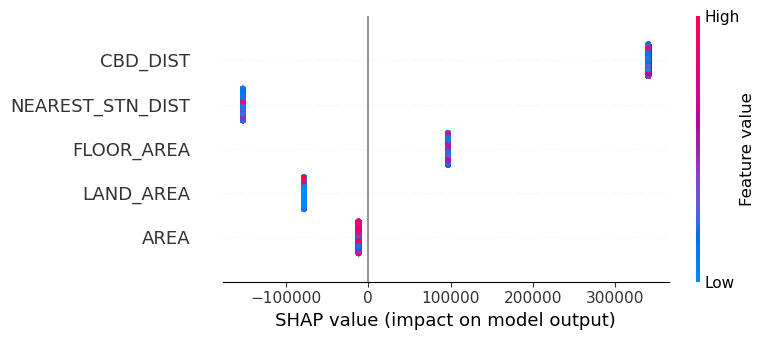

In [73]:

# Inisialisasi objek Explainer untuk model terbaik
explainer = shap.Explainer(model_rfr_best.named_steps['regressor'])

# Menghitung SHAP values untuk set data uji
shap_values = explainer(X_test)  # Ubah X_test sesuai dengan data uji Anda

# Menampilkan plot summary SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)

In [74]:
feature_importance = model_rfr_best.named_steps['regressor'].feature_importances_

# Nama-nama fitur
feature_names = X_train.columns
sorted_idx = np.argsort(feature_importance)[::-1]

# Mengurutkan feature importance dan nama-nama fitur
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

# Menampilkan feature importance
print("Feature Importance:")
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Feature Importance:
AREA: 0.0919
NEAREST_STN_DIST: 0.2868
CBD_DIST: 0.3876
FLOOR_AREA: 0.0816
LAND_AREA: 0.1521


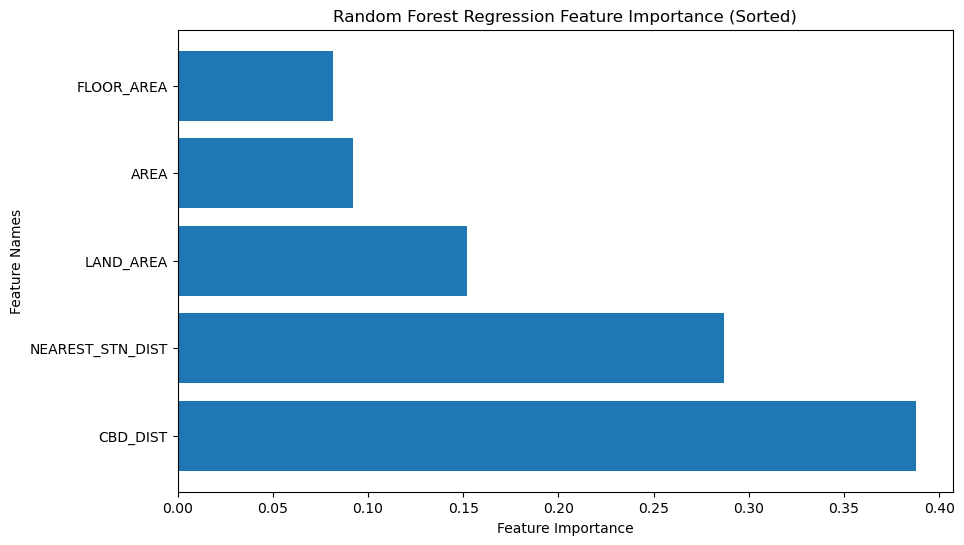

In [75]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Regression Feature Importance (Sorted)')
plt.show()

**INSIGHT:**
-   Dapat dilihat pada hasil SHAP Value, bahwa model yang saya miliki belum bagus atau belum siap untuk dilakukan publish. Dikarenakan hasil dari variabel-variabel feature yang saya pilih terlihat pengaruhnya terhadap variabel target (price) di kondisi yang stagnan. Hal ini bisa dijelaskan jika variabel CBD_DIST mengalami perubahan, maka dampak terhadap price juga akan sama saja dengan hasil perubahannya yaitu price tetap berada pada 300.000 AUD.

-   Sedangkan jika melihat dari feature importance. 

    -   Variabel CBD_DIST memiliki nilai feature yang paling tinggi dibandingkan dengan variabel lain yaitu sebesar 0.3864 hal ini menandakan bahwa CBD_DIST memiliki kontribusi yang besar terhadap model.

    -   Variabel NEAREST_STN_DIST dengan nilai 0.2882

    -   Variabel LAND_AREA dengan nilai 0.1522

    -   Variabel AREA dengan nilai 0.0921

    -   dan Variabel FLOOR_AREA dengan nilai 0.0811
    

# 9. Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [76]:
pipe_rfr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both',
                                                                              variables=['NEAREST_STN_DIST',
                                                                                         'CBD_DIST',
                                                                                         'FLOOR_AREA',
                                                                                         'LAND_AREA'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['NEAREST_STN_DIST',
                                                   'CBD_DIST', 'FLOOR_AREA',
                                                   'LAND_AREA']),
                                                 ('Categorical', 'passthrough',
                                                  ['AREA'])])),
                ('regressor', RandomForestRegressor())])

In [77]:
# Menyimpan model menggunakan pickle
with open('final_pipeline1.pkl', 'wb') as file_1:
    pickle.dump((pipe_rfr), file_1)


# 10. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled

dilakukan pada `P1M2_Guardian_inf.ipynb`

# 11. Kesimpulan

> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

-   **BUSSINES:**

    - Setelah dicek keterhubungannya dengan Harga rumah di Perth Australia, ternyata ada beberapa faktor yang secara signifikan berpengaruh untuk terhadap harga rumah tersebut. Diantara lain adalah Area, Luas tanah, Luas lantai, Jarak Ke pusat Bisnis, Jarak ke stasiun terdekat.
    
    - Jarak rumah terhadap sekolah tidak mempengaruhi harga rumah tetapi jarak rumah ke stasiun terdekat mempengaruhi harga. Hal ini bisa terjadi dikarenakan untuk menempuh jarak rumah ke skolah sudah terdapat banyak transportasi-transportasi umum atau kendaraan pribadi yang dimiliki oleh tiap orang. Sehingga jarak rumah tidak mempengaruhi harga rumah melainkan bagaimana kondisi rumah tersebut yang mempengaruhi harga. Sehingga perusahaan pada property tidak perlu khawatir untuk membangun rumah di berbagai kawasan. Mereka harus tetap berfokus untuk memperindah dan memperluas kondisi dari rumah tersebut untuk meningkatkan value harganya. Tetapi perlu memperhatian jarak rumah terhadap stasiun terdekat.

    - Rumah Yang berada pada sub-urban Daiketh, Peppermint Grove, City Beach, Nedlands, Cottesloe memiliki rata-rata harga rumah yang tinggi. Sehingga bisnis property rumah yang bisa menguntungkan perusahaan adalah dengan membangun property rumah di kawasan tersebut. Hal ini bisa didukung karena daerah Daiketh, Peppermint Grove, City Beach, Nedlands, Cottesloe jarak yang dekat dengan pusat perbelanjaan atau bisnis.

    - Usia rumah yang sudah tua bisa saja memiliki harga lebih tinggi dari rumah baru bila keaslian rumah nya tetap terjaga, biasanya target konsumen nya adalah orang-orang yang menyukai hal hal yang sudah berumur.

-   **ABOUT MODEL (Kelebihan dan Kekurangan Model)** 

    - Dari semua model, digunakan model Random Forest Regressor yang memiliki R-squared score tertinggi dari model lainnya. Selain itu nilai Mean Absolute Error (MAE),Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) memiliki nilai yang lebih kecil dari pada model lainnya.

    - Model SVR memiliki nilai r2 yang negatif. Menunjukan tidak cocok untuk melakukan regressi terutama pada data ini.

    - Permodelan yang dibuat disini sudah dapat memprediksi dengan akurat harga dengan berdasarkan faktor - faktor yang sudah disebutkan diatas. Dapat dikatakan akurat nilai r2 nya 75%. Walaupun dengan nilai nilai Mean Absolute Error (MAE),Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) yang bisa dikatakan tinggi untuk mengukur harga rumah.

    - Tetapi jika dilihat dari SHAP Values, model ini bisa dikatakan tidak bagus dan belum siap untuk dilakukan deployment. Hal ini dikarenakan model pada variabel-variabel yang dijadikan feature tidak memiliki pengaruh yang besar terhadap harga rumah. Bahkan bisa dikatakan jika variabel-variabel feature nilainya berubah prediksi perubahan harga rumah hanya stagnan pada 1 harga saja.

    - Hasil permodelan juga dapat dikatakan overfit , belum bisa digunakan untuk keperluan bussiness apalagi berskala besar.

-   **Kinerja Buruk**: Model memiliki kinerja yang kurang memuaskan dalam menjelaskan pengaruh feature-feature selection terhadap harga rumah.

-   **Harus Diperbaiki**: Perlu dilakukan evaluasi lebih lanjut terhadap model untuk mengidentifikasi faktor-faktor yang memengaruhi performa buruknya.

-   **Penyesuaian Model**: Diperlukan penyesuaian pada model, seperti penambahan fitur yang lebih relevan (dikarenakan pada saat melakukan VIF banyak variabel yang dibuang karena memiliki multikolinearitas yang tinggi), tuning parameter, atau penggunaan model yang lebih kompleks.

-   **Langkah-langkah yang Dapat Diambil**:

    - Analisis Faktor-Faktor: Identifikasi faktor-faktor yang memiliki dampak signifikan terhadap prediksi harga dan pastikan model memperhitungkannya dengan benar.

    - Pengembangan Fitur: Pertimbangkan untuk menambahkan fitur tambahan yang mungkin memberikan informasi lebih lanjut terkait harga rumah.

    - Tuning Hyperparameter: Lakukan tuning pada hyperparameter model untuk meningkatkan r-squared prediksi dengan nilai Mean Absolute Error (MAE),Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) yang kecil.

    - Penggunaan Model Lain: Pertimbangkan untuk menggunakan model regresi yang lebih kompleks atau menggabungkan beberapa model (ensemble) untuk meningkatkan kinerja

# CONCEPTUAL PROBLEM

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- Latar belakang : merupakan teknik ensemble learning untuk meningkatkan kinerja model dengan menggabungkan prediksi dari beberapa model yang dibangun secara independen. Pendekatan ini digunakan untuk mengatasi overfitting, meningkatkan stabilitas model, dan mengurangi varians kesalahan prediksi.

- Cara kerja : 

**Bootstrap Sampling**:

Membangun beberapa set data pelatihan baru dengan melakukan bootstrap sampling. Bootstrap sampling melibatkan pengambilan sampel dengan penggantian dari data pelatihan asli. Sehingga setiap set data pelatihan baru dapat memiliki beberapa data yang sama dan beberapa data yang tidak termasuk.

**Model Independen**:

Untuk setiap set data pelatihan yang baru, model dibangun secara independen. Dalam konteks ini, model dapat berupa model yang sama (misalnya, pohon keputusan) atau jenis model yang berbeda.

**Prediksi Individual**:

Setiap model memberikan prediksi pada data pengujian yang belum pernah dilihat sebelumnya.

**Aggregasi Prediksi**:

Prediksi dari semua model diagregasi untuk menghasilkan prediksi akhir. Agregasi dapat dilakukan dengan cara seperti mengambil rata-rata (untuk regresi) atau melakukan voting (untuk klasifikasi).

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

A. Random forest :
Random Forest menggunakan teknik bagging dengan bootstrap sampling. Setiap pohon (model) dibangun pada subset acak dari data pelatihan dengan penggantian.
Keuntungannya adalah  membantu mengurangi overfitting dan variabilitas model dengan memastikan bahwa setiap pohon melihat variasi yang berbeda dari data.

B. AdaBoost Regression :
Pada setiap iterasi, bobot diberikan pada data yang salah klasifikasi oleh model sebelumnya. Oleh karena itu, model berikutnya lebih fokus pada data yang sulit diklasifikasikan. Keuntungannya dapat memberikan perhatian lebih kepada data yang sulit, meningkatkan kinerja model pada kasus yang sulit.

- Perbedaan Utama:

**Cara Membangun Model**:

Random Forest: Membangun model secara paralel dan independen pada subset data.

AdaBoost: Membangun model secara berurutan, dengan memberikan lebih banyak perhatian pada data yang salah klasifikasi.

**Bobot Data**:

Random Forest: Tidak menggunakan bobot pada data, setiap pohon memiliki kontribusi yang sama.

AdaBoost: Memberikan bobot pada data yang salah klasifikasi untuk memfokuskan perhatian model pada kasus sulit.

## 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation adalah sebuah teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model secara objektif. Tujuannya adalah untuk memahami seberapa baik model akan berperforma pada data yang belum pernah dilihat sebelumnya. Dalam cross-validation, data dibagi menjadi beberapa subset (fold) dan model dilatih serta diuji beberapa kali menggunakan kombinasi berbeda dari subset tersebut.

Keuntungan : Menghindari Overfitting, Evaluasi yang Stabil, Pemilihan Model yang Optimal.